In [8]:
import hddm
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
!pwd

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [10]:
def preprocess_data(fname, load_dir):
    
    #load data
    all_data = hddm.load_csv(load_dir + fname)
    all_data.columns = all_data.columns.str.strip()

    #select relevant variables
    processed_df = all_data[['acc', 'rt', 'cond', 'subj_idx']] 
    #rename for hddm compatibility 
    processed_df = processed_df.rename(index=str, columns={ "cond": "stim", "acc": "response"})
    processed_df['stim'] = processed_df['stim'].str.strip()   

#     #clean data 
#     rtSig = processed_df.rt.std()
#     rtMu = processed_df.rt.mean()
    cutoff =  .6
    processed_df = processed_df[processed_df.rt<cutoff]
    processed_df.reset_index(drop=True, inplace=True)
    
    #flip sign of rt for errors 
    processed_df = hddm.utils.flip_errors(processed_df)
    
    #print dataframe 
    print(processed_df.head(3))
    
    #plot rt histogram 
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
    for i, subj_data in processed_df.groupby('subj_idx'):
        subj_data.rt.hist(bins=20, histtype='step', ax=ax)

    #print unique subject ids, unique conditions, n_subjects  
    print(np.unique(processed_df.subj_idx), np.unique(processed_df.stim), len(np.unique(processed_df.subj_idx)))
    
    return processed_df 

In [11]:
def estimate_ddm_params(processed_df, write_dir,
                        depends_on={}, model_name='_sim_model',
                        bias=True, include=['v', 't', 'a', 'z'], n_samples=3000, n_burned_samples=500, 
                        p_outlier=0, save_plots=True, save_stats=True, save_traces=False):

    #make directory for each model
    os.mkdir(model_dir+model_name)
    
    #which parameter is varying by condition?
    depends_on=depends_on

    #fit hddm model according to above 
    m=hddm.HDDM(processed_df, depends_on=depends_on, bias=bias, 
                include=include, p_outlier=p_outlier)
    m.find_starting_values()
    
    if save_traces: 
        m.sample(n_samples, burn=n_burned_samples,
                 dbname=model_name+'_traces.db', db='pickle')
    else: 
        m.sample(n_samples, burn=n_burned_samples)

    m.plot_posteriors(save=save_plots, path=model_dir+model_name+'/'+model_name+'_posteriors')

    if save_stats: 
        m.print_stats(model_dir+model_name+'/'+model_name+'_stats.csv')
        
    
    return m

### Test functions

In [12]:
!pwd
write_dir = ('/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/')
print(write_dir)
model_dir = ('/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/')
load_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
print(load_dir)
fname = 'probC_sim_learning_signals.csv'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/
/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/


   response     rt stim  subj_idx
0     False -0.182   lc         0
1     False -0.222   lc         0
2      True  0.352   lc         0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] ['hc' 'hv' 'lc' 'lv'] 24


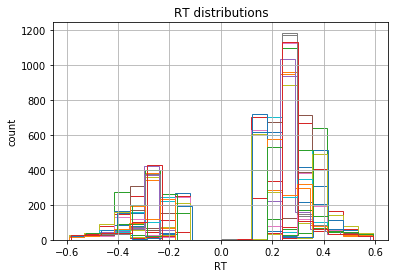

In [13]:
 processed_df=preprocess_data(fname,load_dir)

fitting  sim_a_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_a_alone


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 899.4 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
fitting  sim_v_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_v_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 854.1 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t
Plotting t_std
Plotting z


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting z_std
fitting  sim_tr_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_tr_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 928.5 secPlotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
fitting  sim_z_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_z_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 1248.1 secPlotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


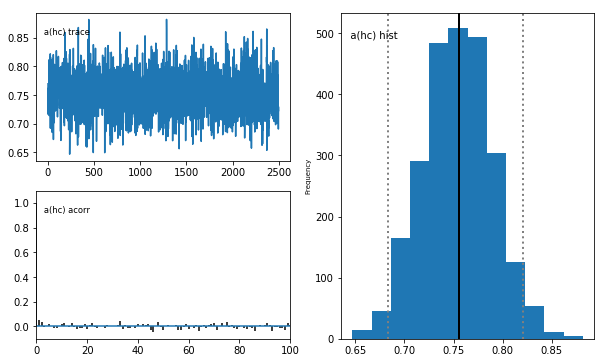

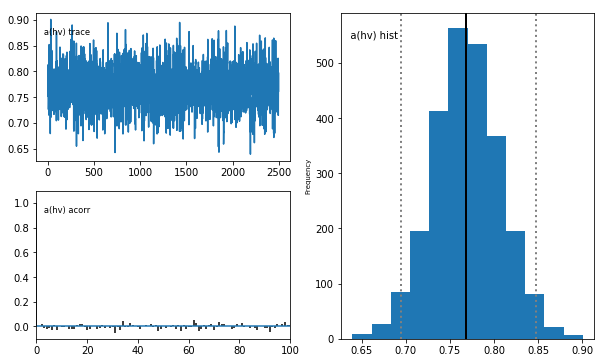

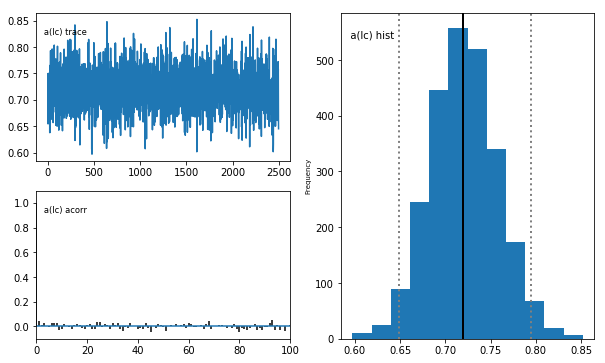

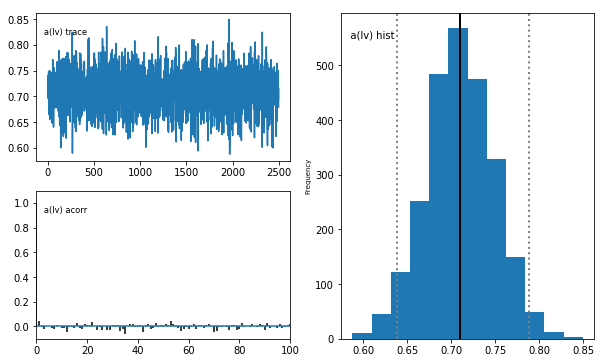

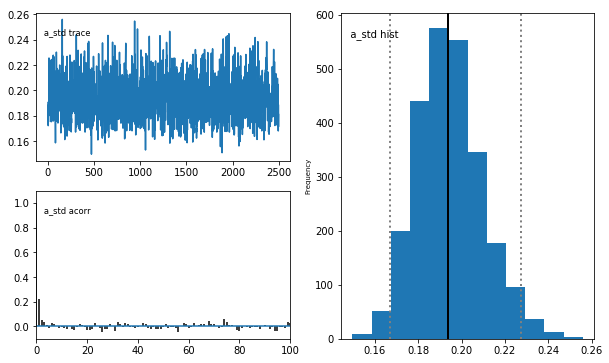

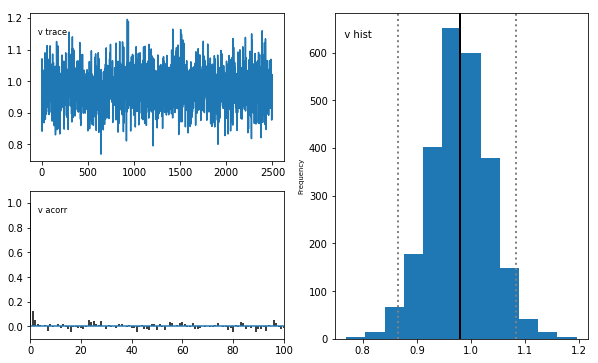

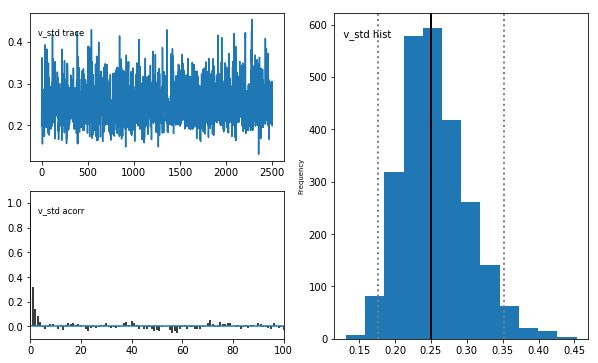

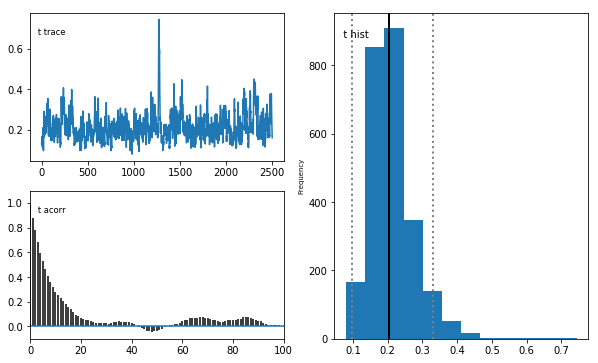

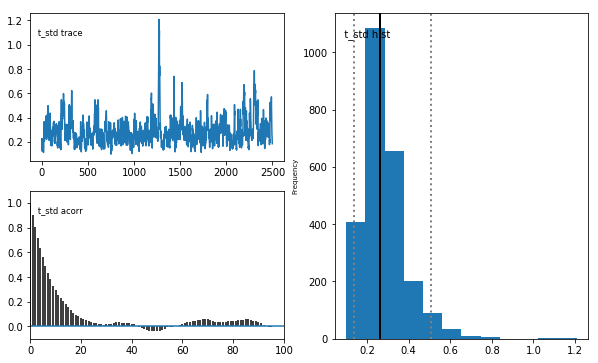

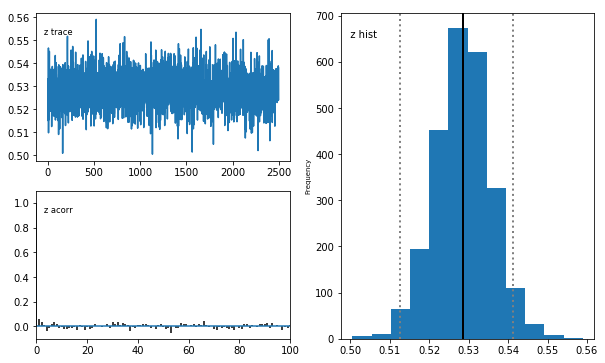

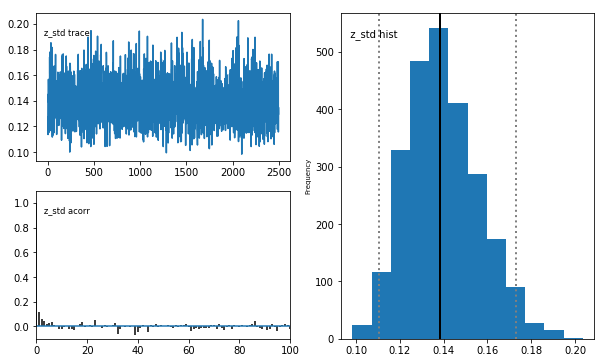

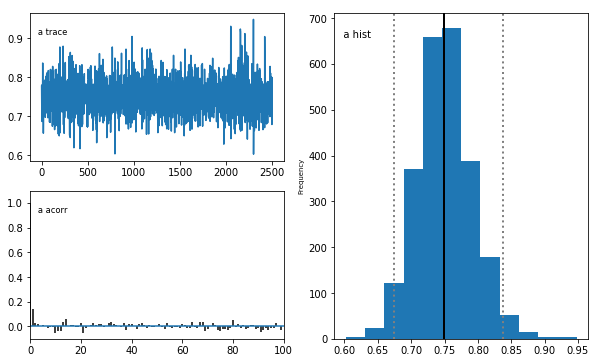

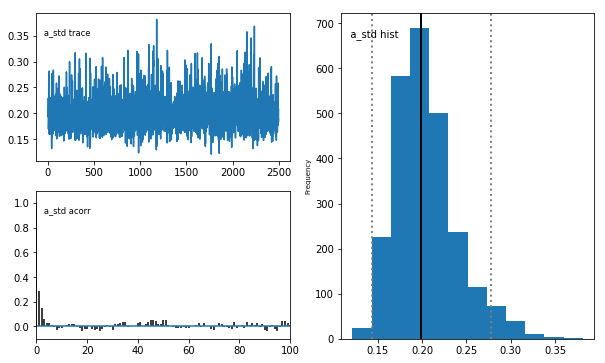

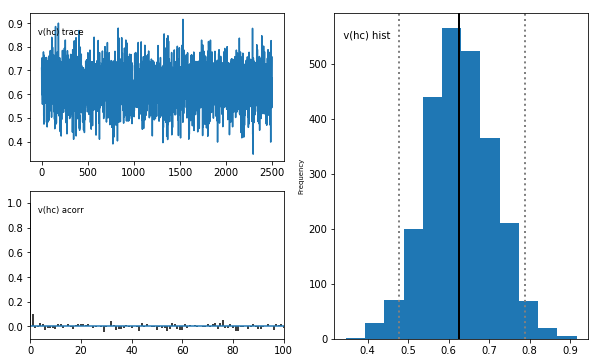

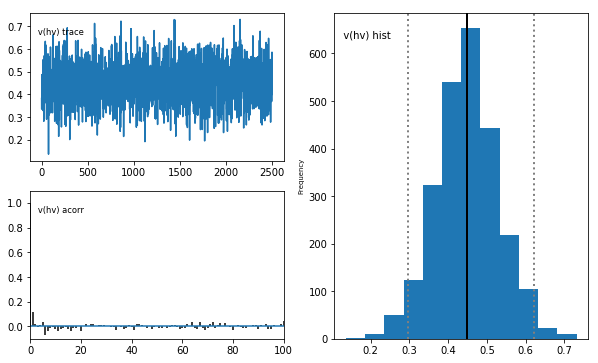

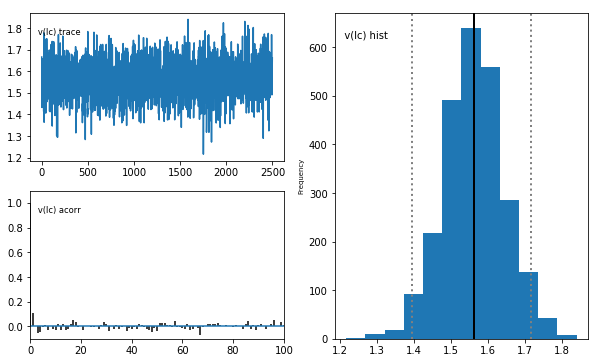

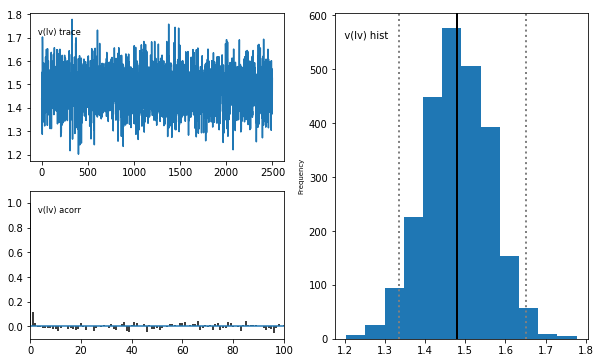

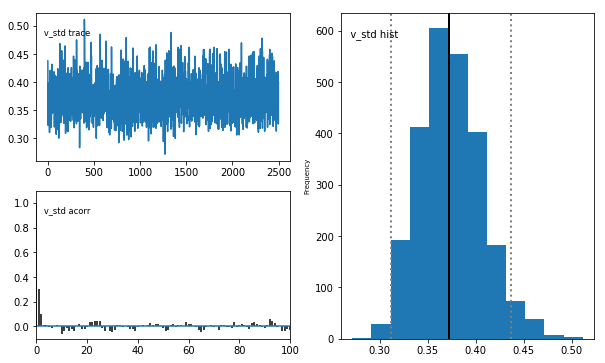

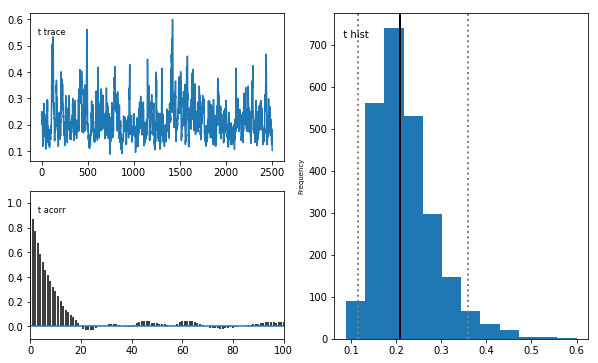

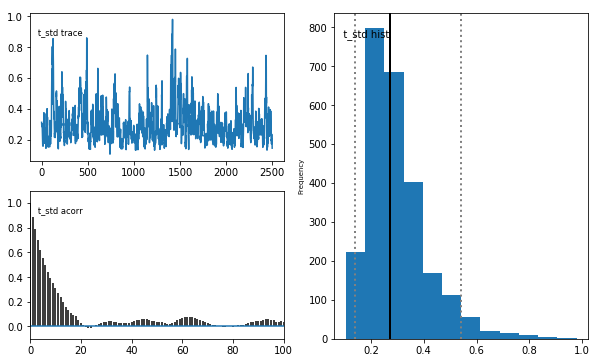

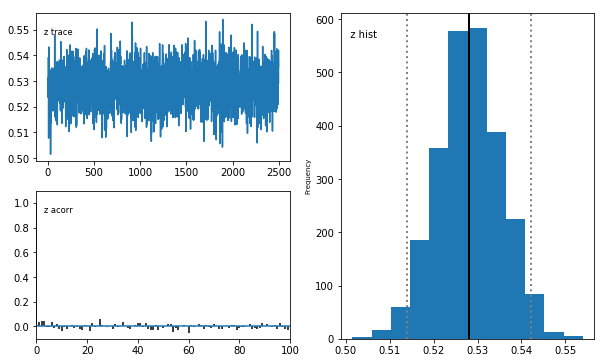

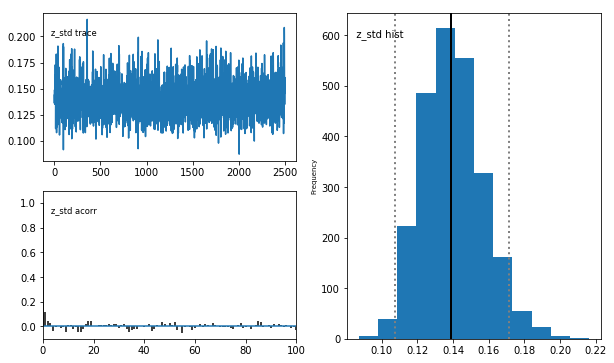

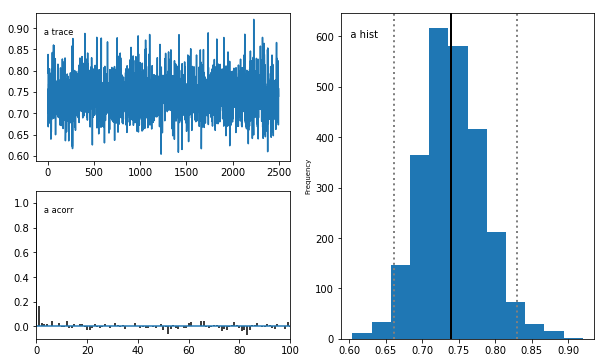

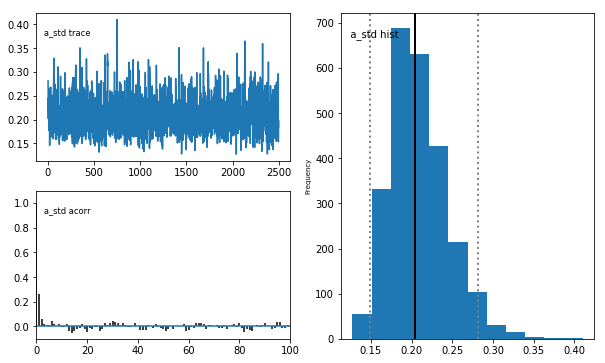

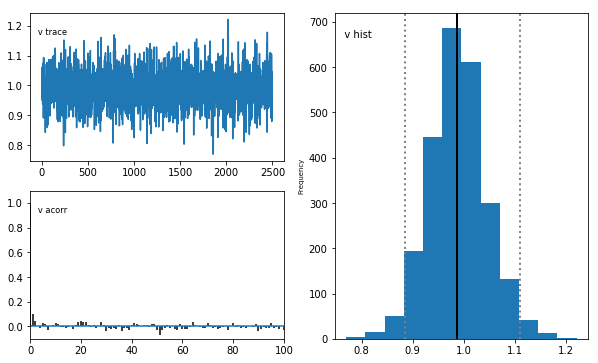

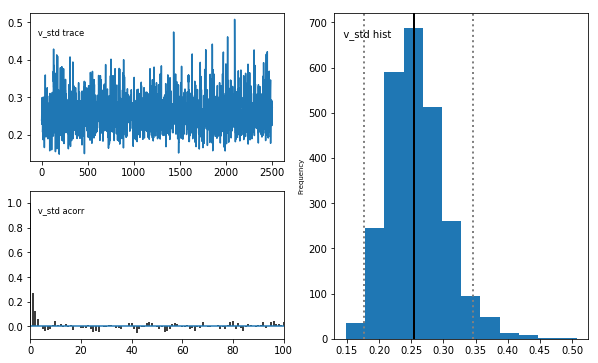

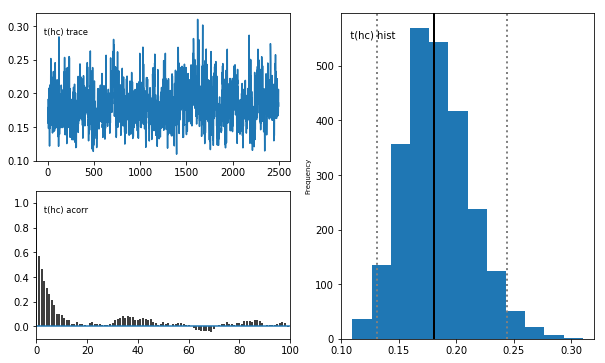

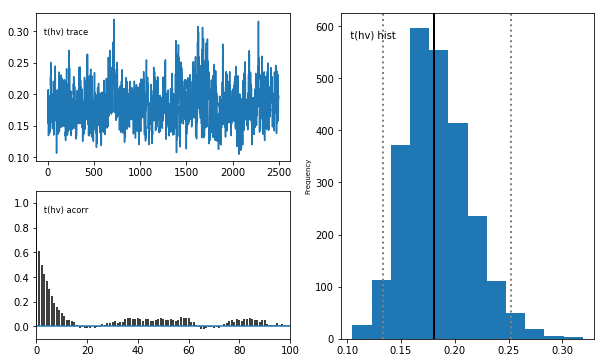

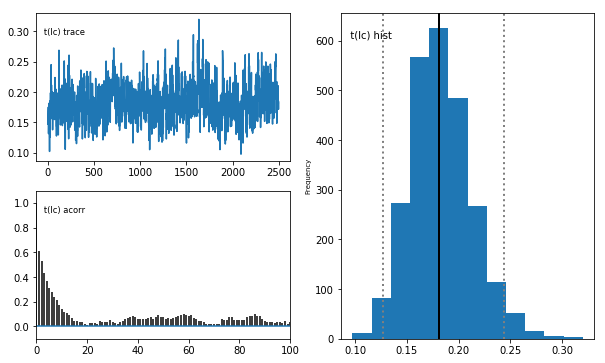

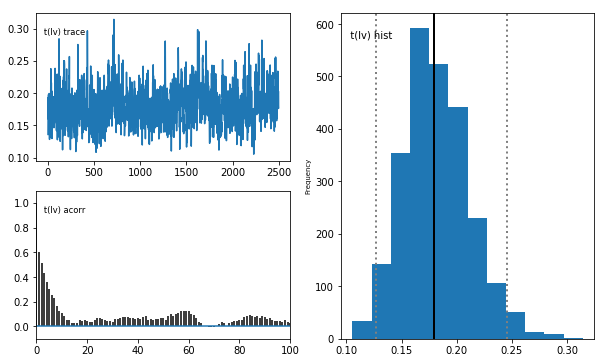

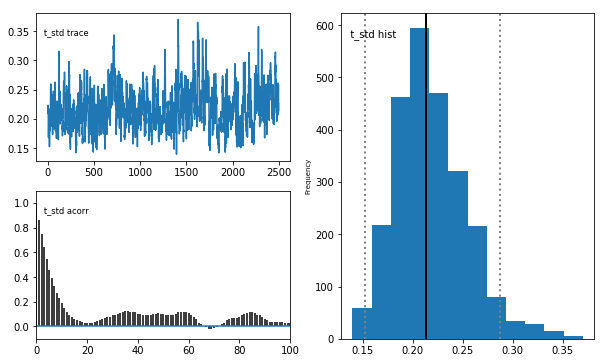

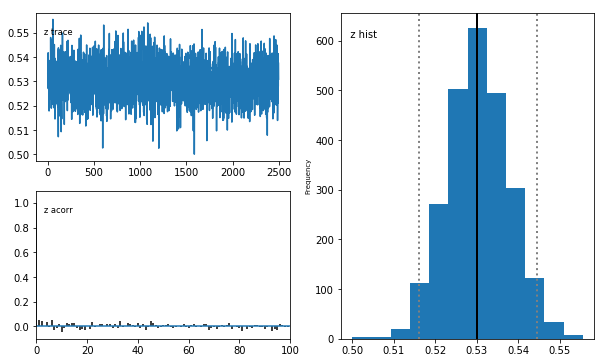

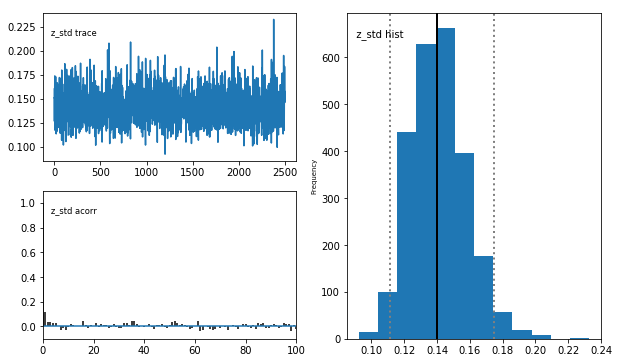

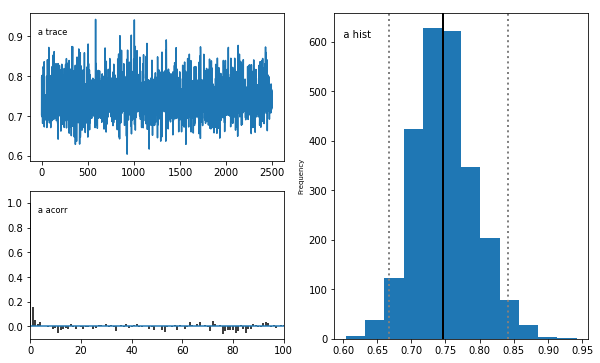

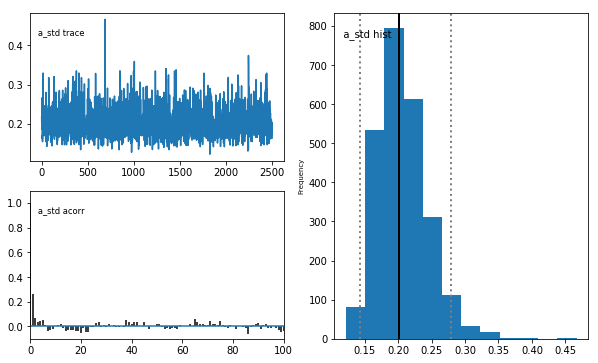

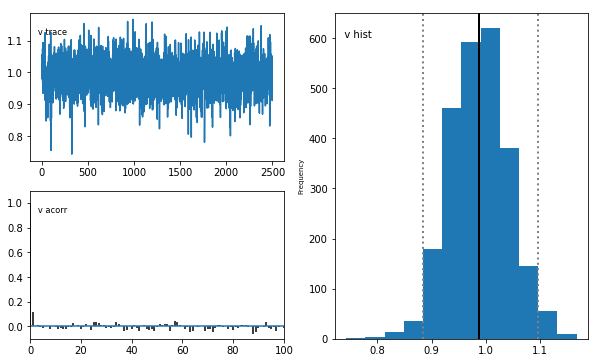

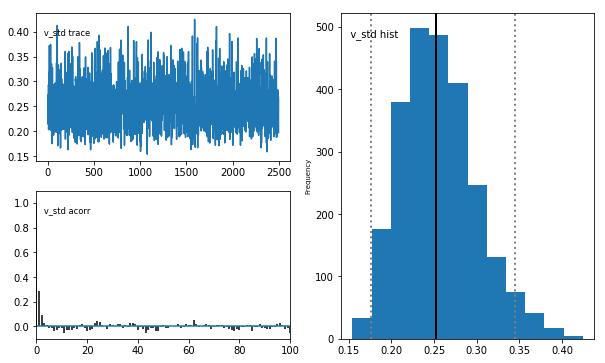

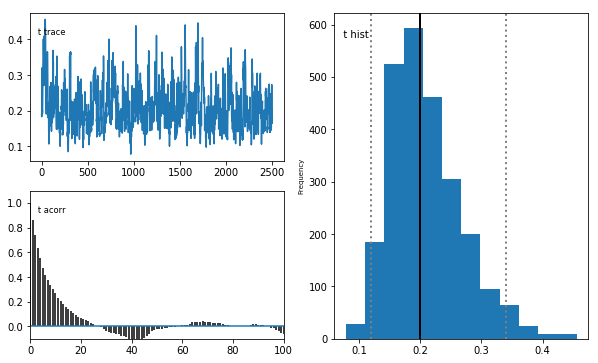

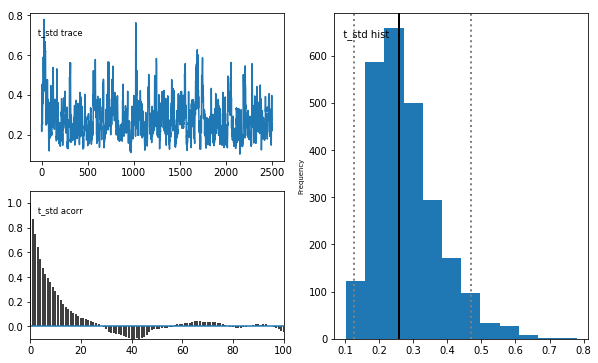

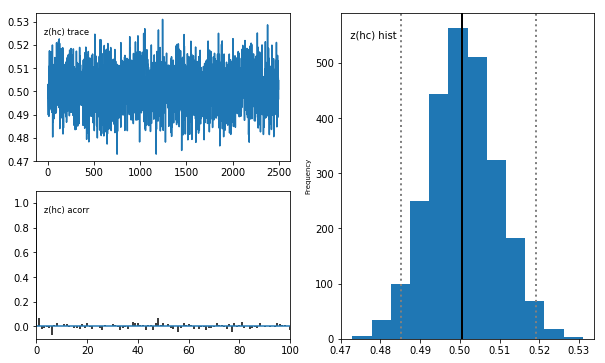

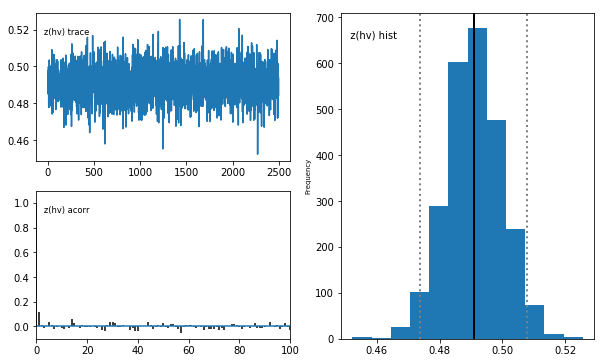

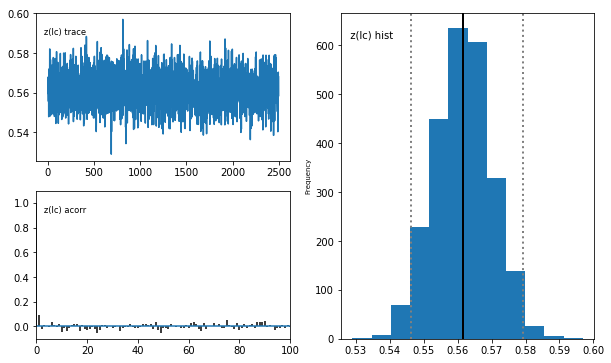

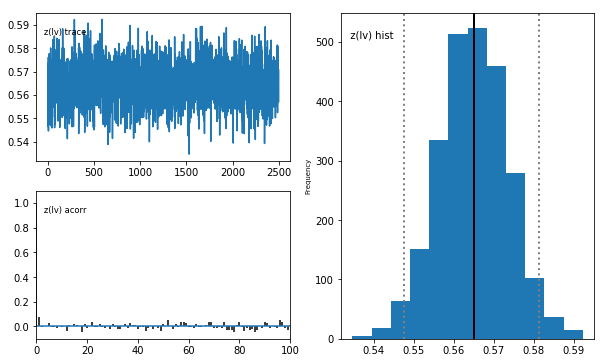

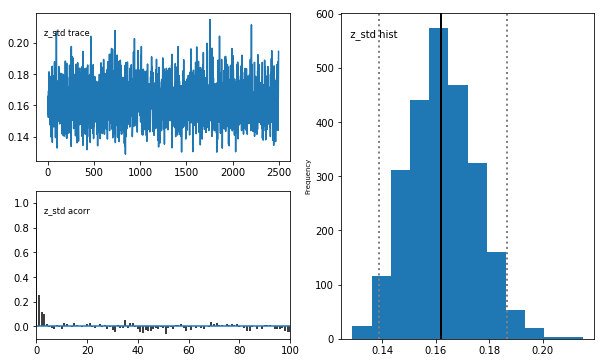

In [19]:
#single parameter models 
model_names=['sim_a_alone', 'sim_v_alone', 'sim_tr_alone', 'sim_z_alone']
parameters=[{'a':'stim'},{ 'v':'stim'}, {'t':'stim'}, {'z':'stim'}]
dics_single_param = []

#fit all parameters 
for model, parameter in zip(model_names, parameters):
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_single_param.append(m.dic)


In [20]:
model_names_header = ', '.join(model_names)
print_dics_single_param = np.column_stack(dics_single_param)

In [21]:
np.savetxt(write_dir+'sim_dics/sim_single_param_dics.csv', print_dics_single_param, header=model_names_header, delimiter=',',comments='')

In [22]:
dics_single_param

[-58625.887917890235,
 -59694.307121249418,
 -59084.946079142814,
 -59056.616301865208]

In [23]:
single_param_dic_dir = write_dir+'sim_dics/sim_single_param_dics.csv'
single_param_dics = pd.read_csv(single_param_dic_dir)
single_param_dics.columns = single_param_dics.columns.str.strip()

In [40]:
worst_single_p_model, winning_single_p_model = single_param_dics.idxmax(axis=1)[0], single_param_dics.idxmin(axis=1)[0]

print('single param. worst_model: ', worst_single_p_model, '\nsingle param. winning_model: ', winning_single_p_model)

single param. worst_model:  sim_a_alone 
single param. winning_model:  sim_v_alone


In [36]:
single_param_dics

sim_a_alone   sim_v_alone  sim_tr_alone   sim_z_alone
0 -58625.887918 -59694.307121 -59084.946079 -59056.616302

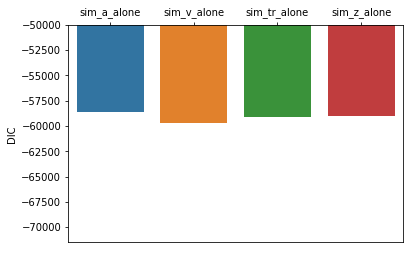

In [41]:
ax=sns.barplot(data=single_param_dics, order=model_names)
ax.set(ylabel='DIC')

plt.ylim(-71500, -50000)
ax.xaxis.tick_top()
plt.show()

### Drift-rate is meaningful. 

{'v': 'stim', 'a': 'stim'}
fitting  sim_a_v  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_a_v


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 837.2 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
{'t': 'stim', 'v': 'stim'}
fitting  sim_tr_v  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_tr_v
 [-----------------100%-----------------] 3001 of 3000 complete in 841.1 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
{'v': 'stim', 'z': 'stim'}
fitting  sim_z_v  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_z_v
 [-----------------100%-----------------] 3000 of 3000 complete in 775.7 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


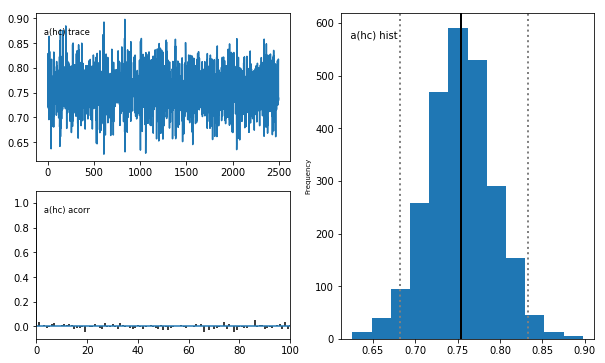

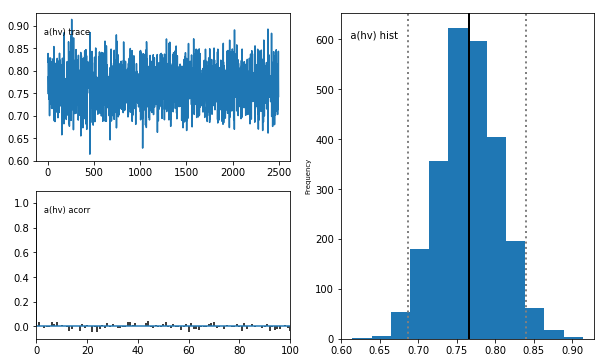

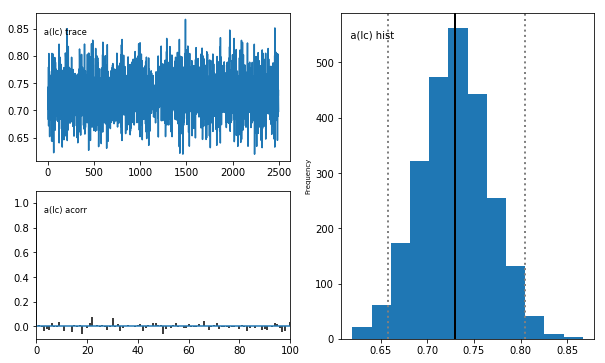

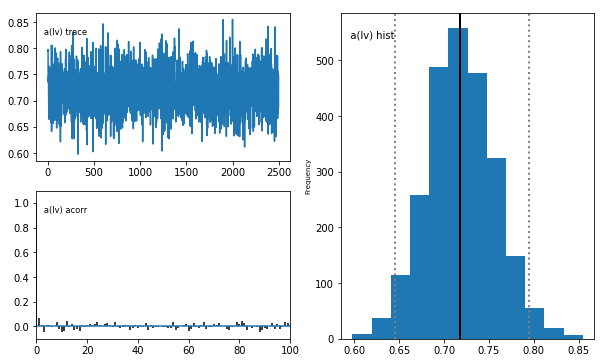

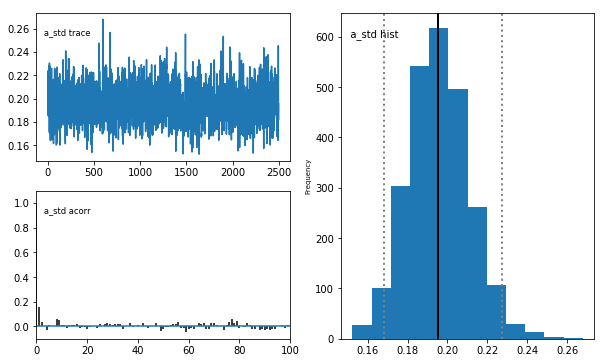

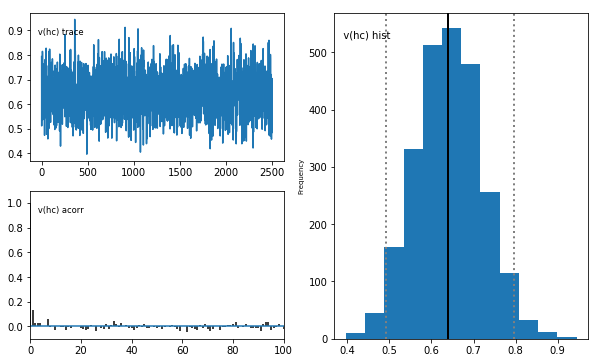

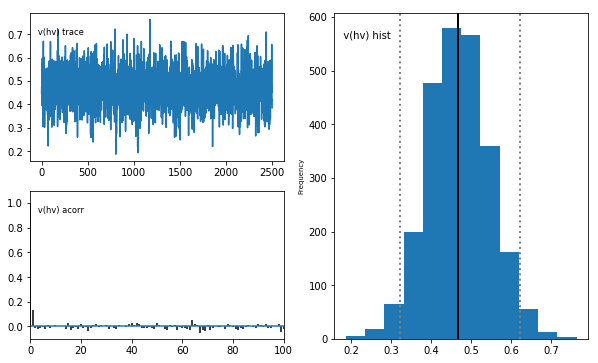

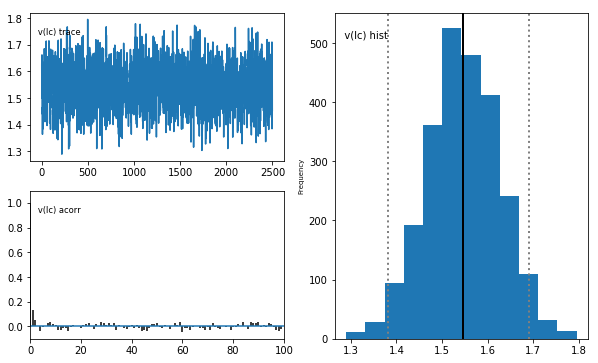

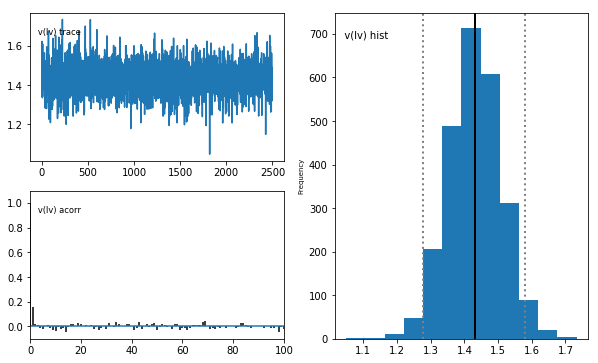

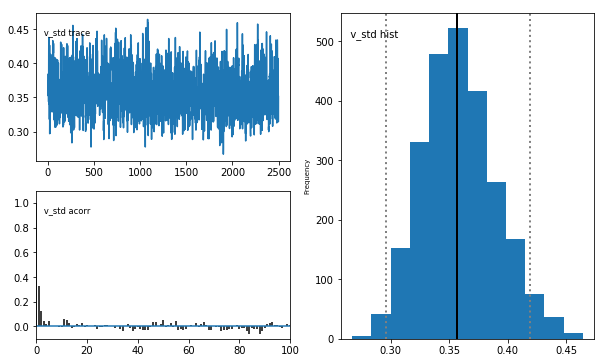

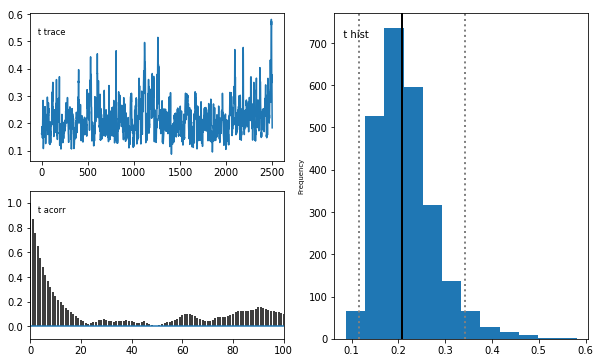

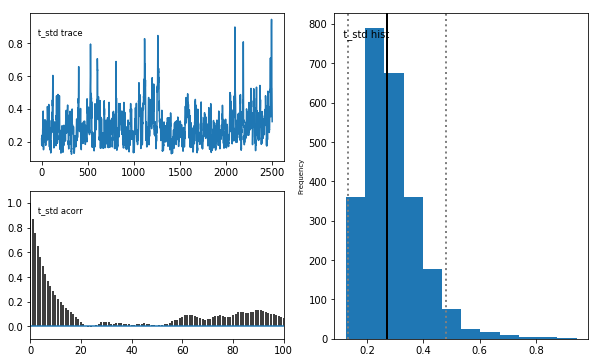

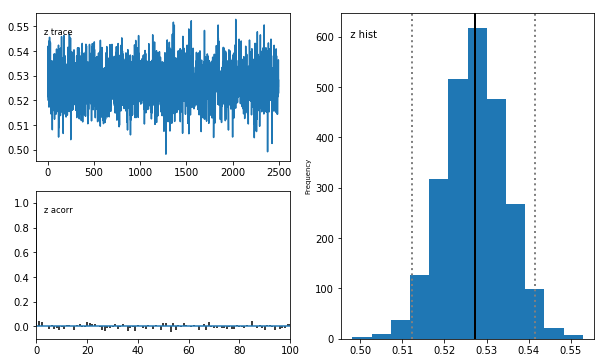

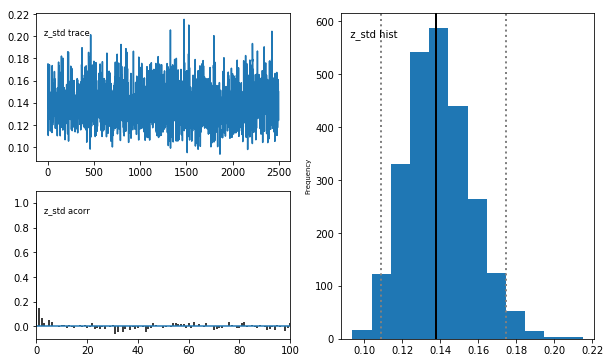

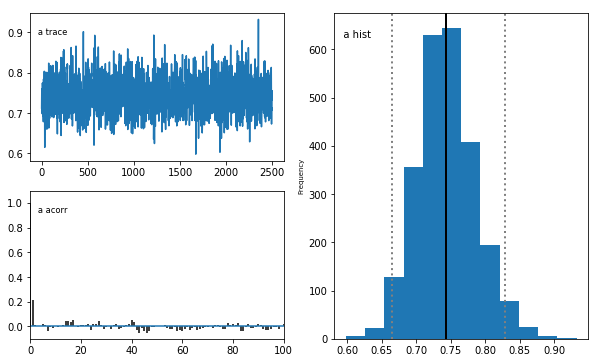

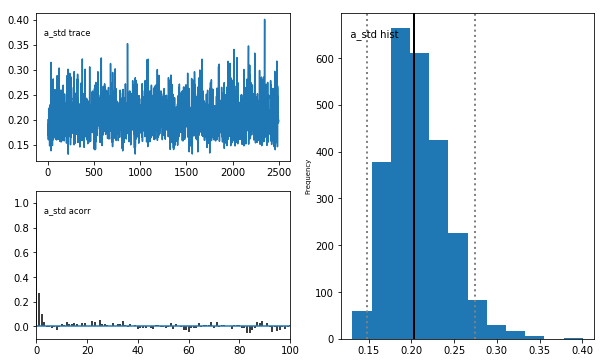

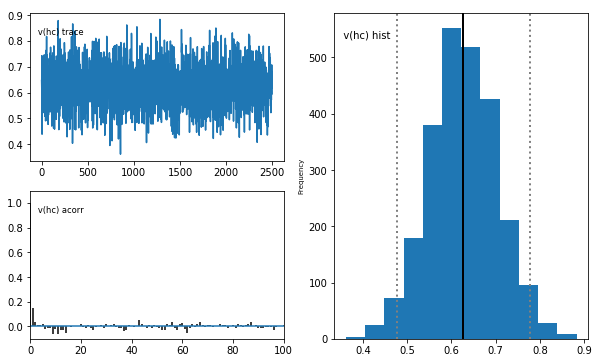

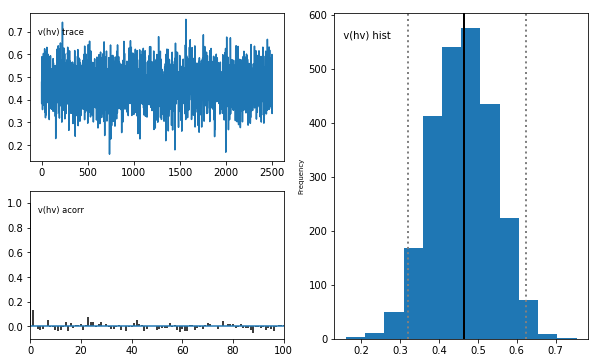

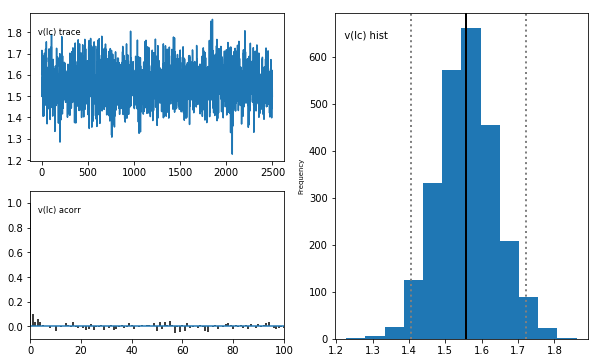

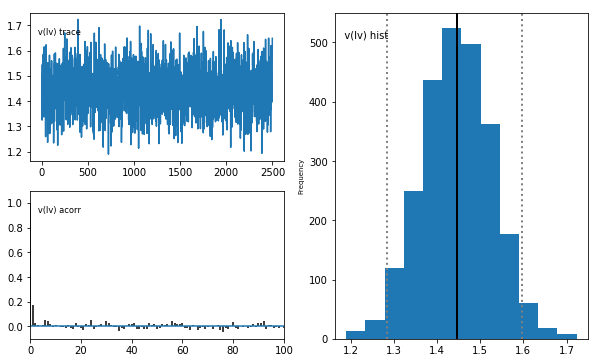

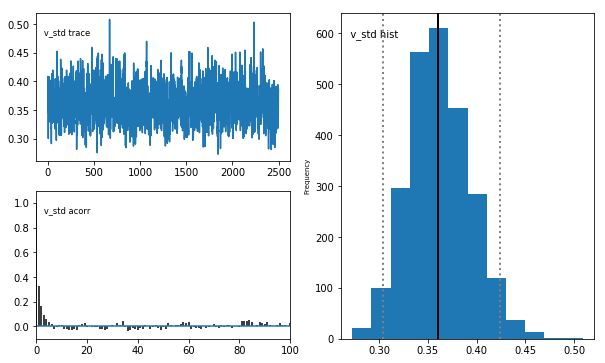

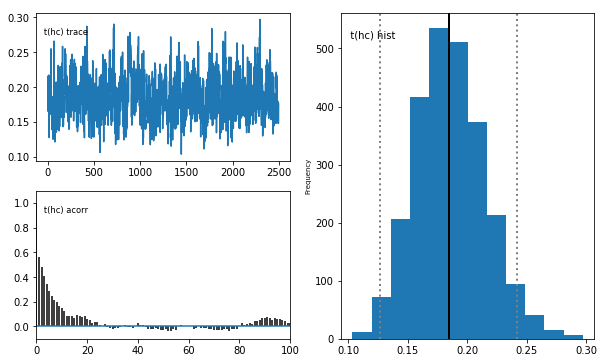

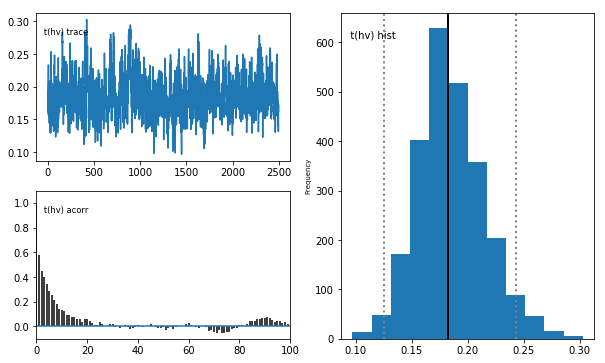

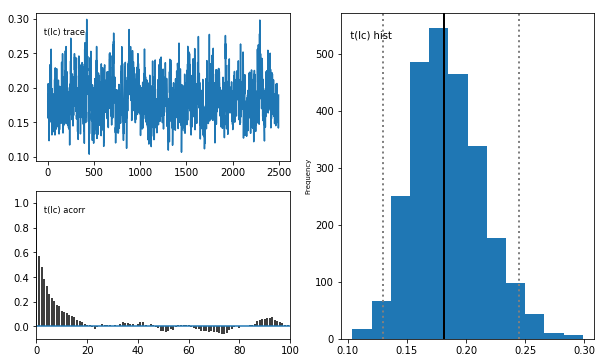

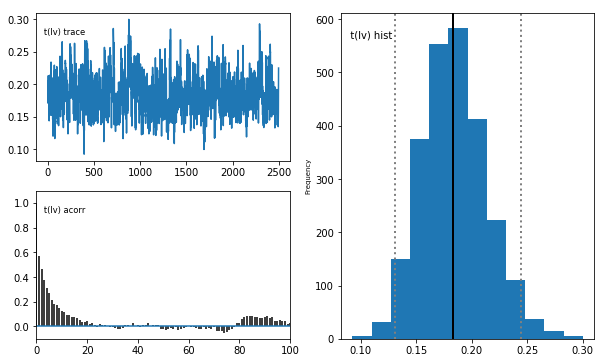

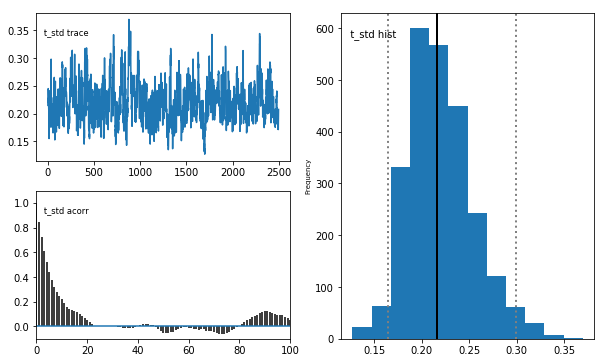

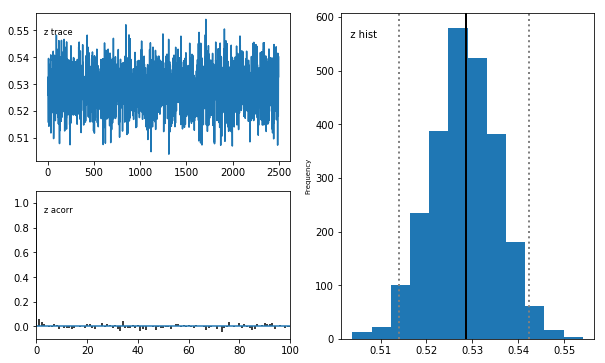

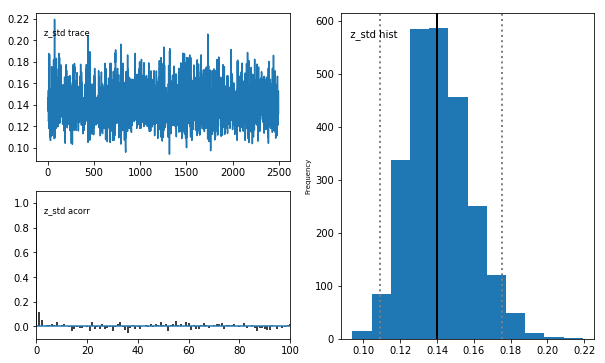

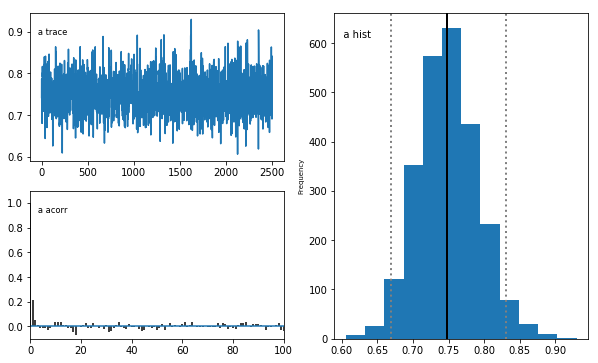

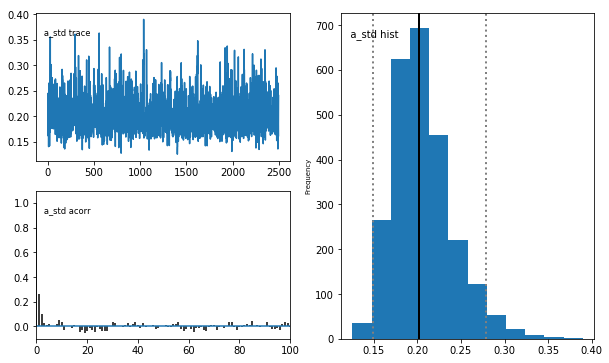

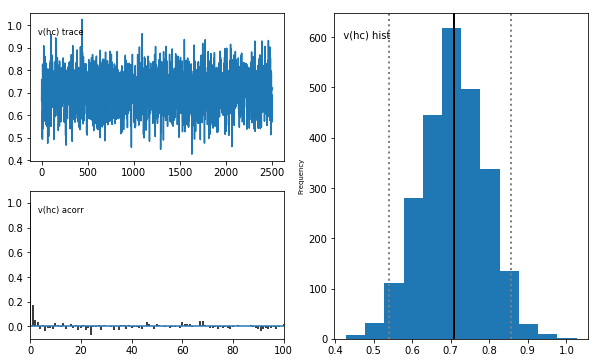

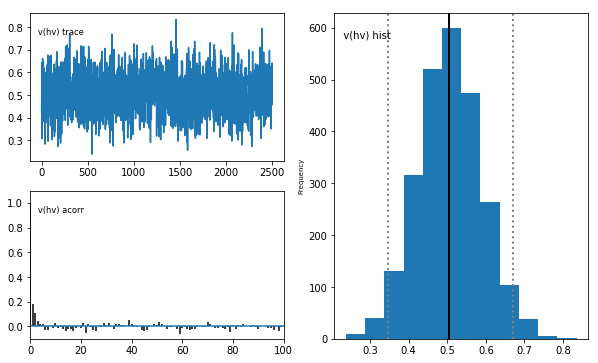

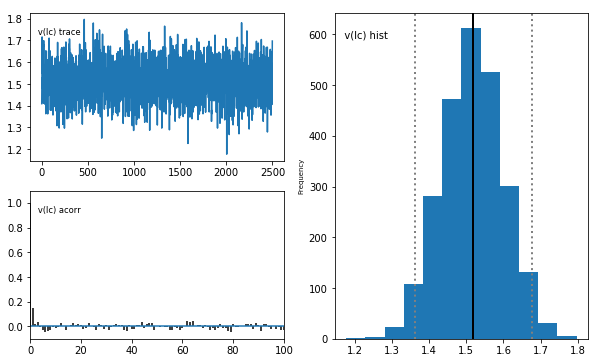

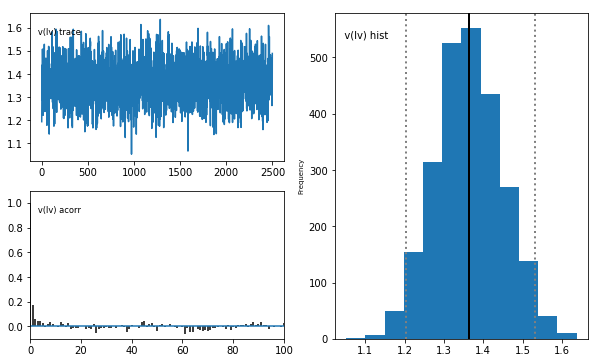

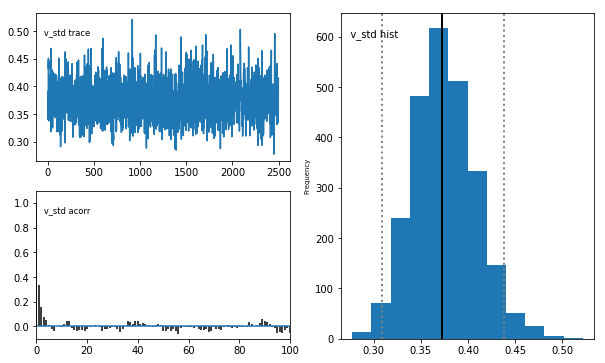

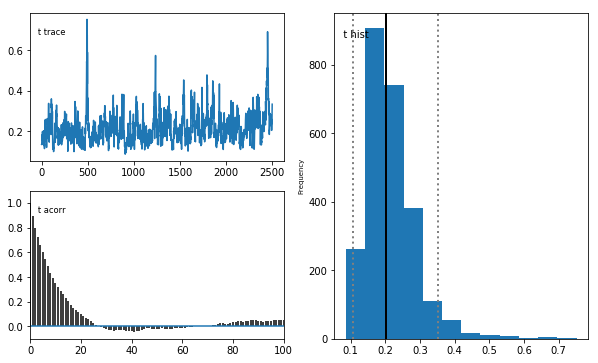

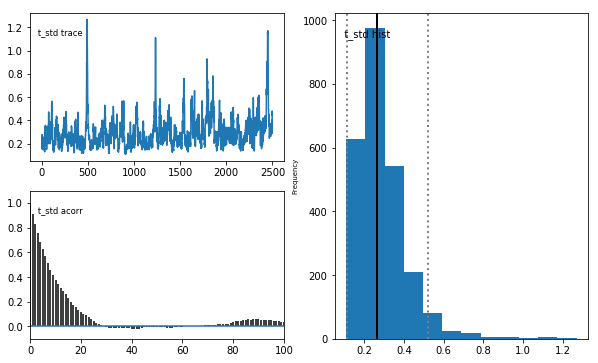

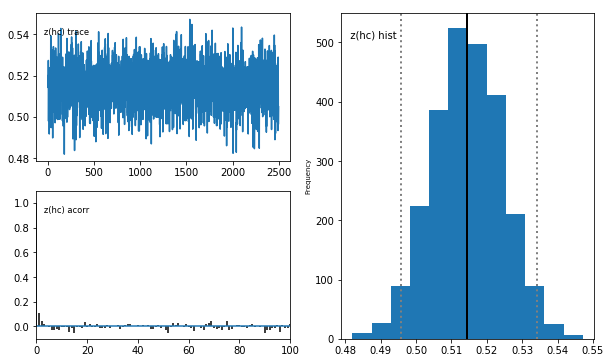

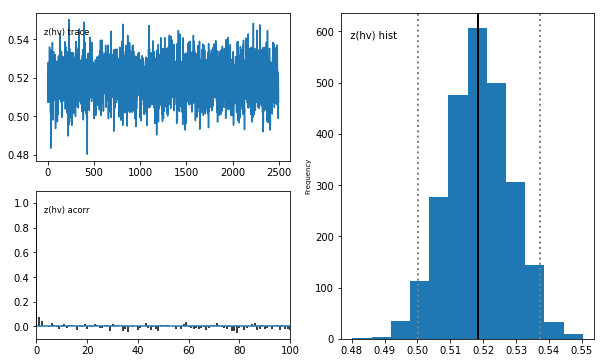

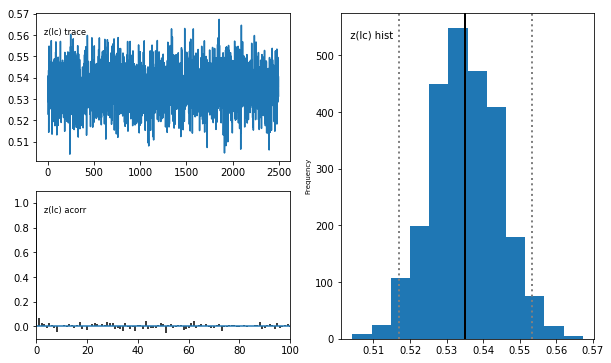

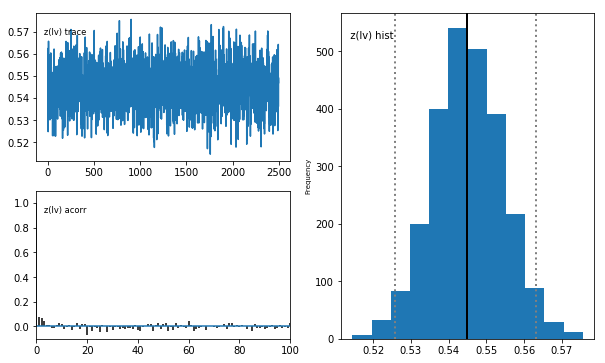

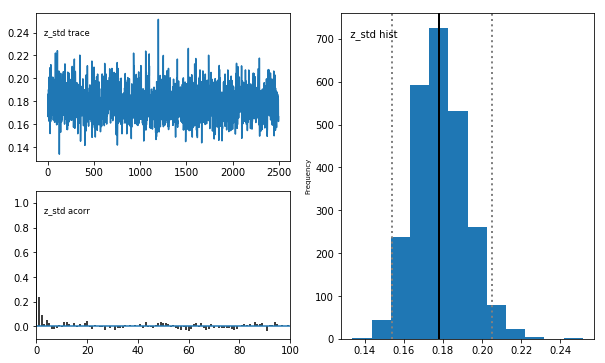

In [43]:
dual_param_model_names=['sim_a_v', 'sim_tr_v', 'sim_z_v']
parameters_dual_param=[{'a':'stim','v':'stim'}, {'t':'stim','v':'stim'},
                      {'z':'stim','v':'stim'}]
dics_dual_param = []

#fit all parameters 
for model, parameter in zip(dual_param_model_names, parameters_dual_param):
    print(parameter)
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_dual_param.append(m.dic)


In [44]:
dual_param_model_names_header = ', '.join(dual_param_model_names)
print_dics_dual_param = np.column_stack(dics_dual_param)
np.savetxt(write_dir+'sim_dics/sim_dual_param_dics.csv', print_dics_dual_param, header=dual_param_model_names_header, delimiter=',',comments='')

In [45]:
dics_dual_param

[-60062.950160324537, -60586.646605167996, -60007.913369894413]

In [46]:
dual_param_dic_dir = write_dir+'sim_dics/sim_dual_param_dics.csv'
dual_param_dics = pd.read_csv(dual_param_dic_dir)
dual_param_dics.columns = dual_param_dics.columns.str.strip()

In [47]:
dual_param_dics

sim_a_v      sim_tr_v      sim_z_v
0 -60062.95016 -60586.646605 -60007.91337

### (Drift + threshold) + non-decision time appear to explain data better than starting point bias + non-decision time. 

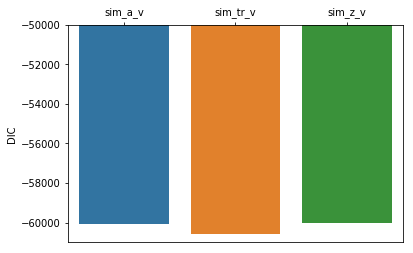

In [51]:
ax=sns.barplot(data=dual_param_dics, order=dual_param_model_names)
ax.set(ylabel='DIC')

# plt.ylim(-99750, -98000)
plt.ylim(-61000, -50000)

ax.xaxis.tick_top()
plt.show()

{'v': 'stim', 'a': 'stim', 't': 'stim'}
fitting  sim_a_v_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_a_v_tr


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 774.9 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
{'v': 'stim', 't': 'stim', 'z': 'stim'}
fitting  sim_z_v_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_models/sim_z_v_tr
 [-----------------100%-----------------] 3000 of 3000 complete in 792.6 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


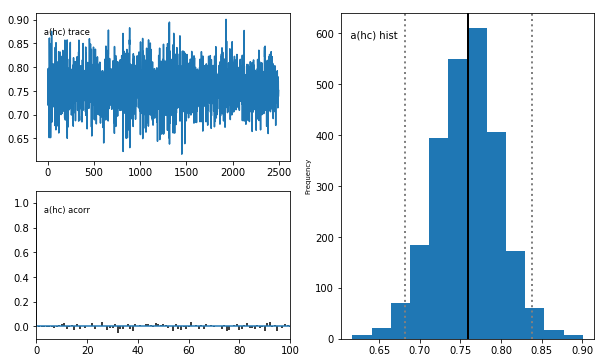

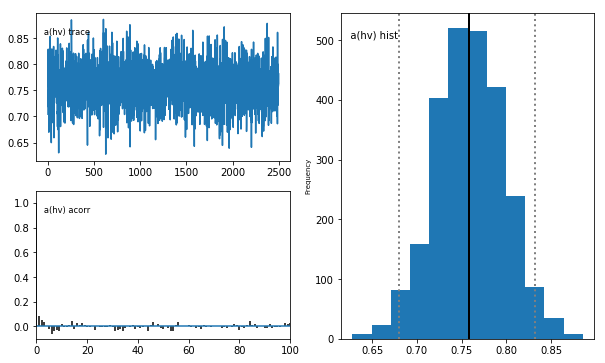

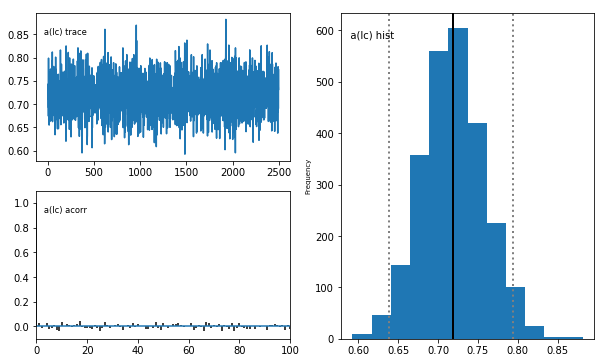

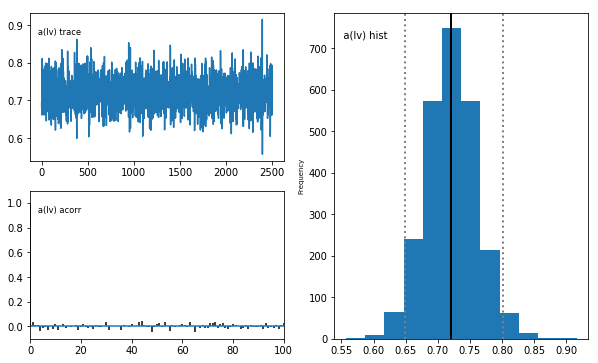

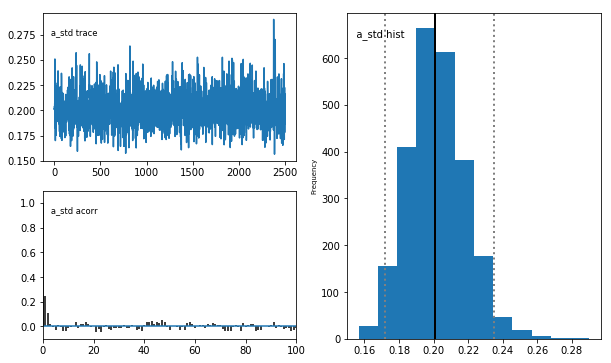

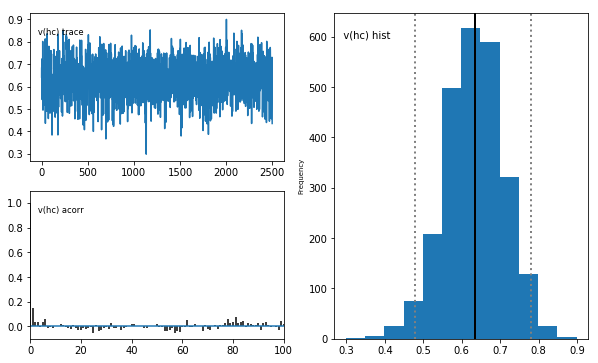

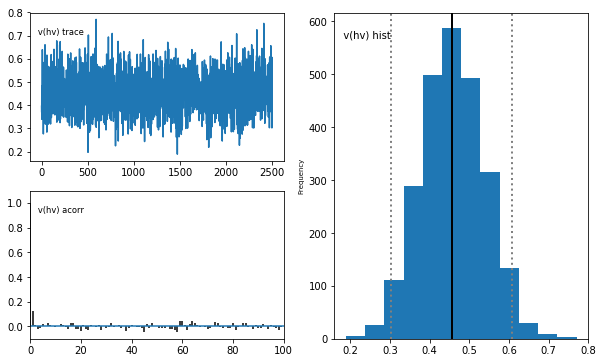

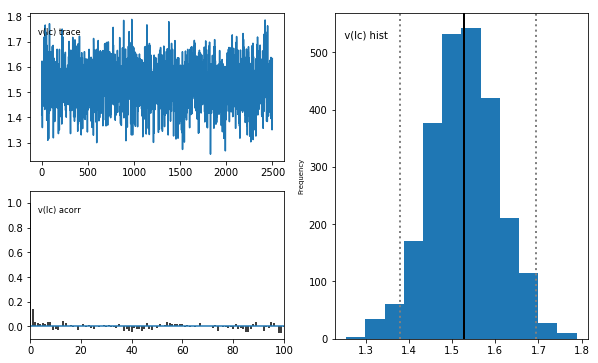

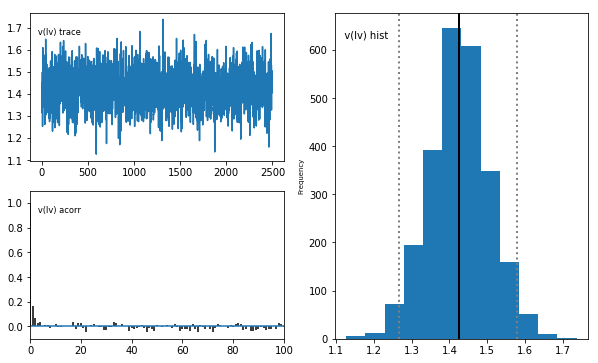

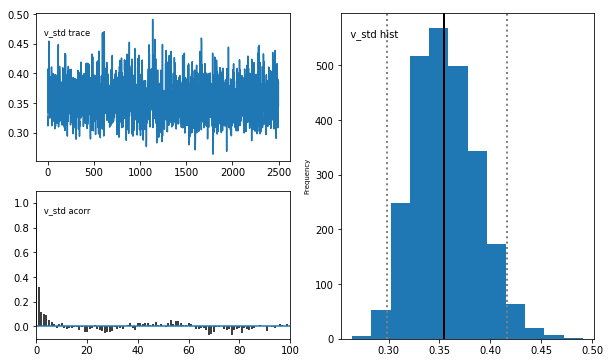

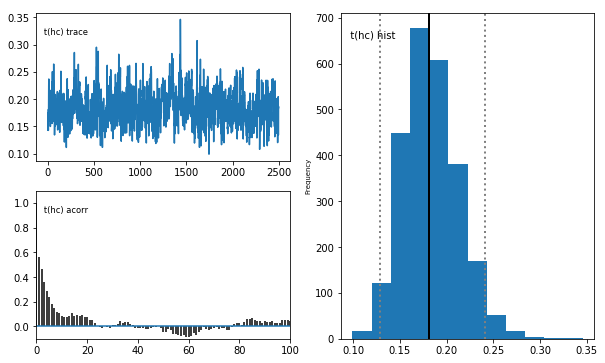

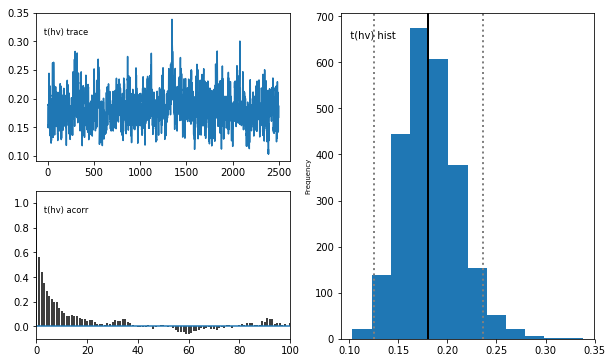

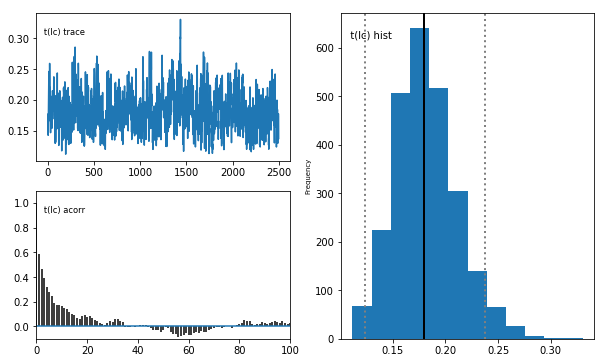

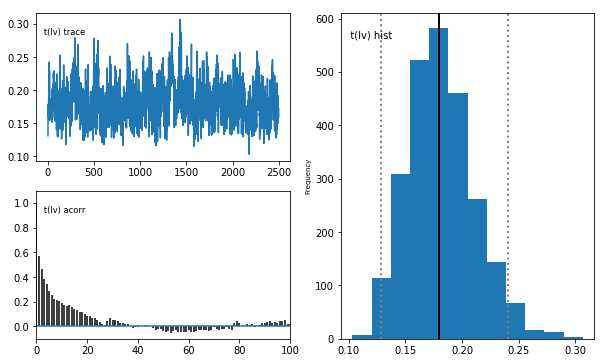

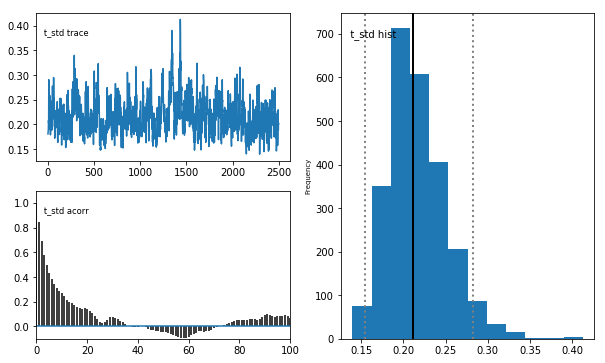

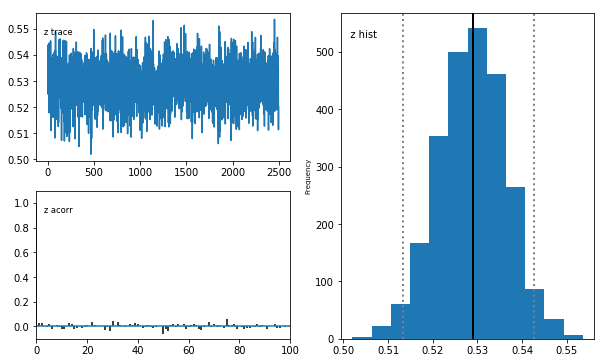

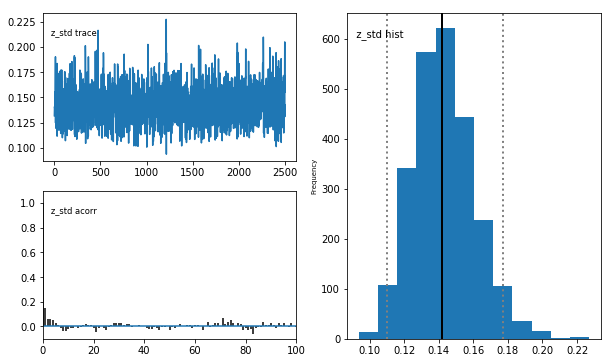

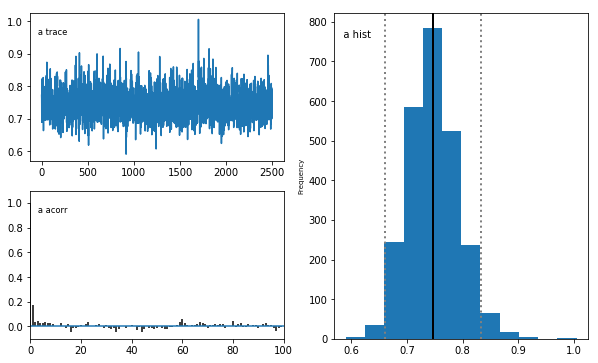

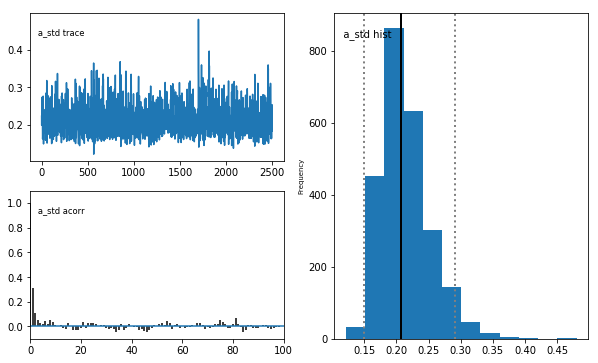

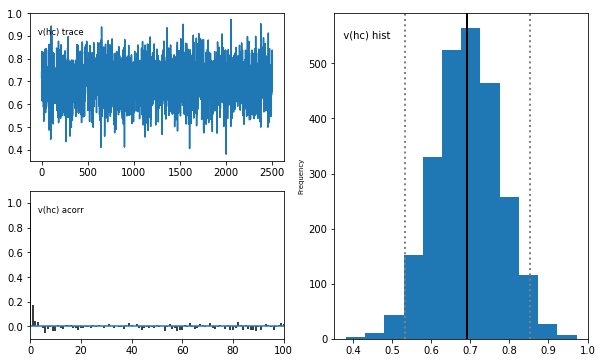

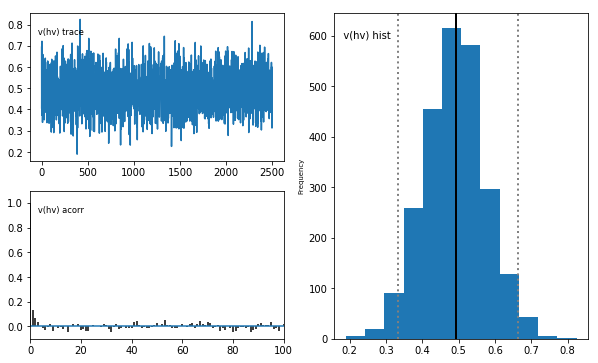

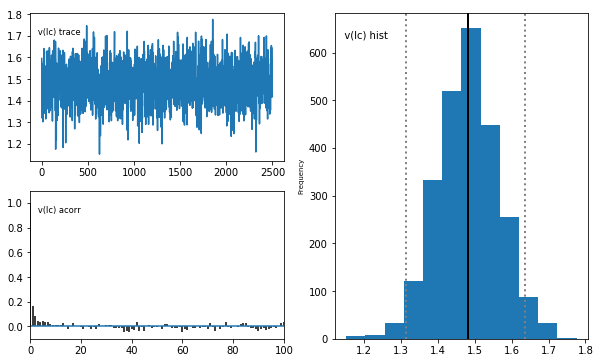

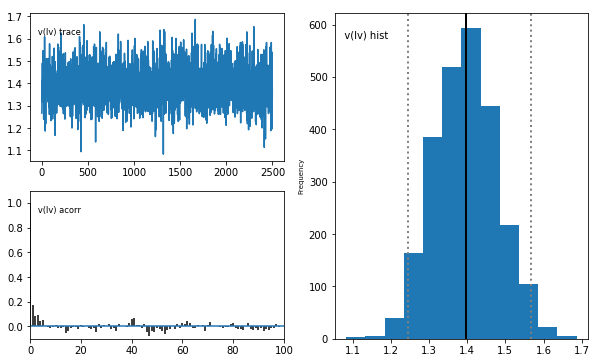

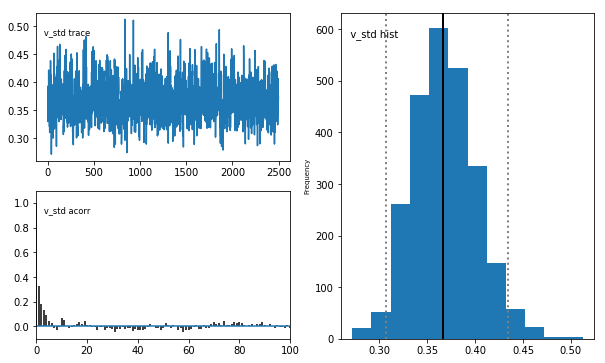

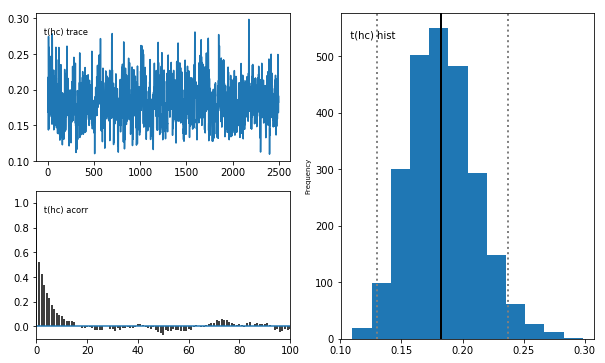

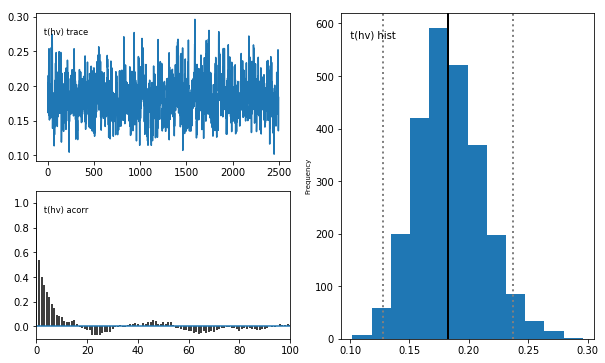

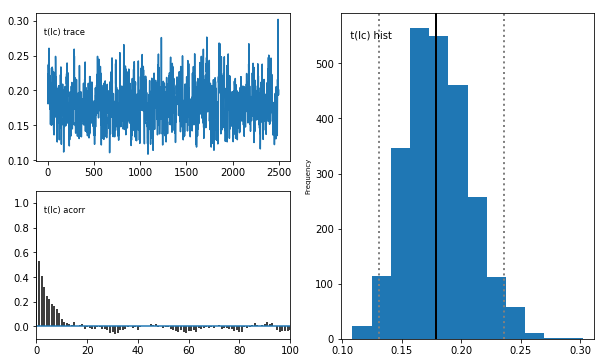

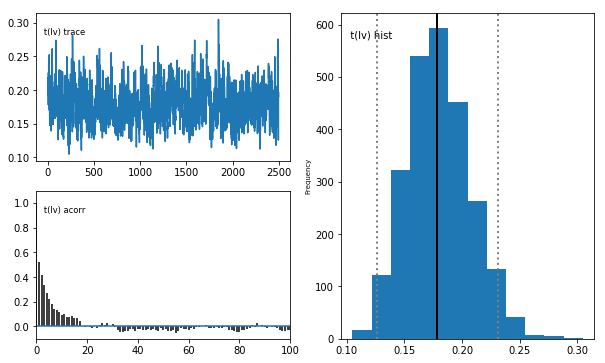

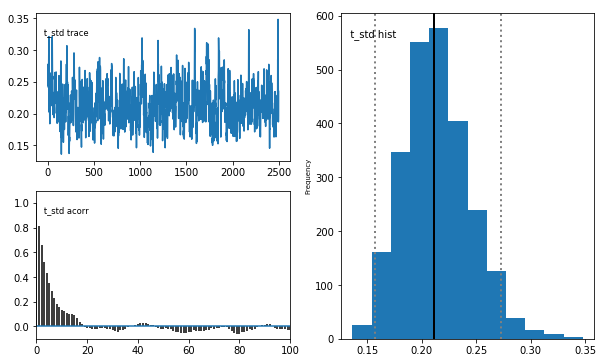

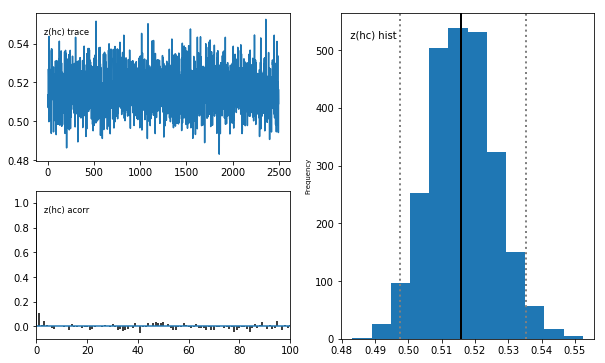

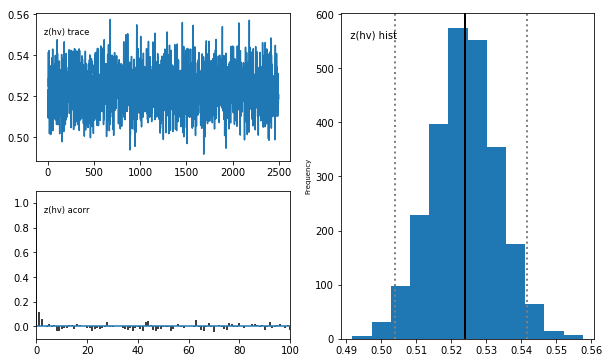

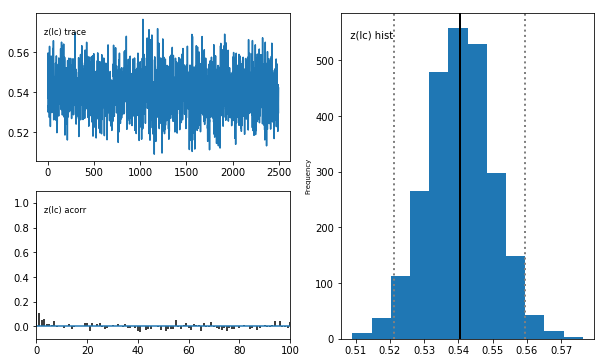

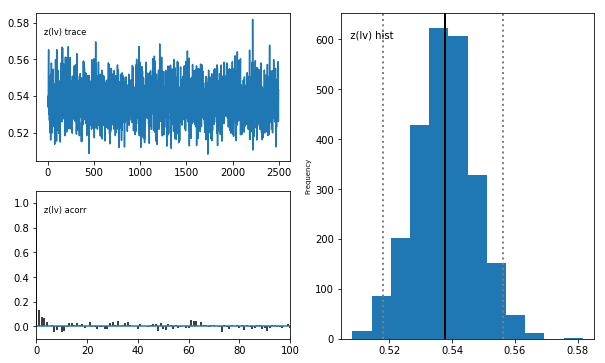

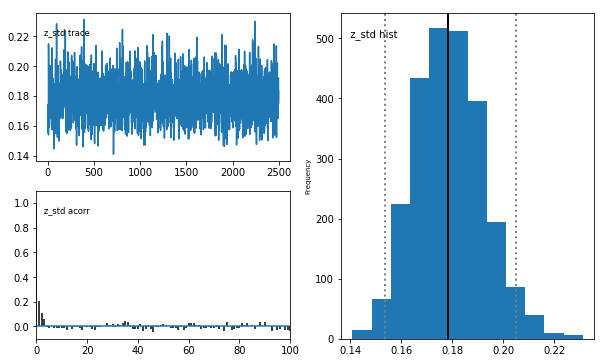

In [53]:
triple_param_model_names=['sim_a_v_tr', 'sim_z_v_tr']
parameters_triple_param=[{'a':'stim','v':'stim', 't':'stim'}, {'z':'stim','v':'stim', 't':'stim'}]
dics_triple_param = []

#fit all parameters 
for model, parameter in zip(triple_param_model_names, parameters_triple_param):
    print(parameter)
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_triple_param.append(m.dic)


In [54]:
triple_param_model_names_header = ', '.join(triple_param_model_names)
print_dics_triple_param = np.column_stack(dics_triple_param)
np.savetxt(write_dir+'sim_dics/sim_triple_param_dics.csv', print_dics_triple_param, header=triple_param_model_names_header, delimiter=',',comments='')

In [55]:
triple_param_dic_dir = write_dir+'sim_dics/sim_triple_param_dics.csv'
triple_param_dics = pd.read_csv(triple_param_dic_dir)
triple_param_dics.columns = triple_param_dics.columns.str.strip()

In [56]:
triple_param_dics

sim_a_v_tr    sim_z_v_tr
0 -60859.175449 -60829.706551

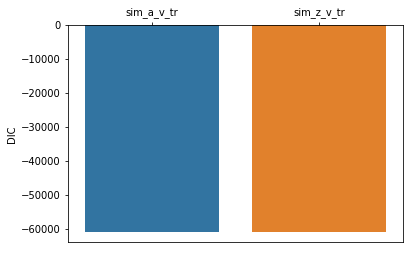

In [63]:
ax=sns.barplot(data=triple_param_dics, order=triple_param_model_names)
ax.set(ylabel='DIC')

# plt.ylim(-101000, -100000)
# plt.ylim(-73500, -72000)

ax.xaxis.tick_top()
plt.show()

In [58]:
triple_param_dics

sim_a_v_tr    sim_z_v_tr
0 -60859.175449 -60829.706551

/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 663.8 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


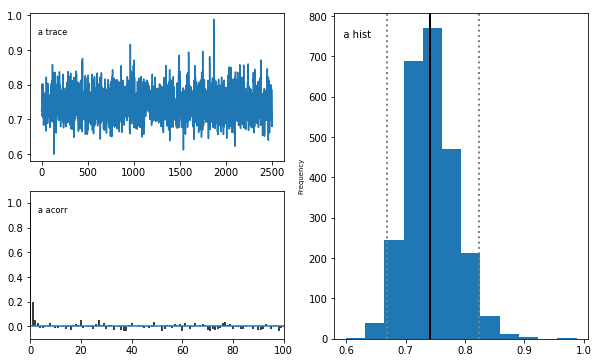

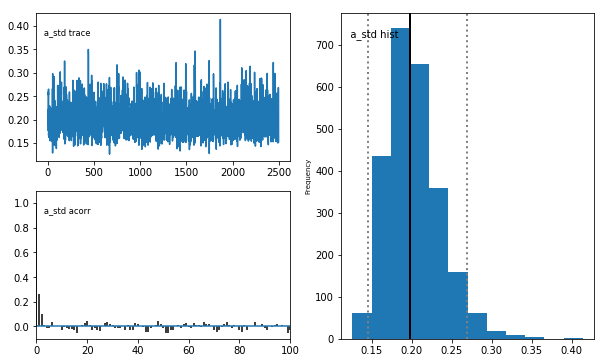

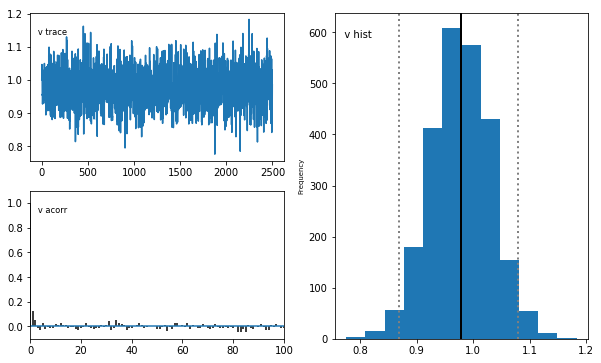

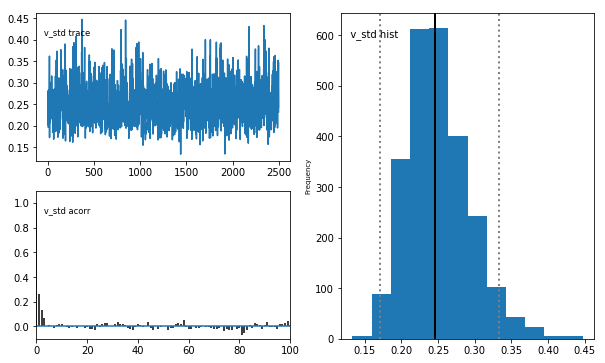

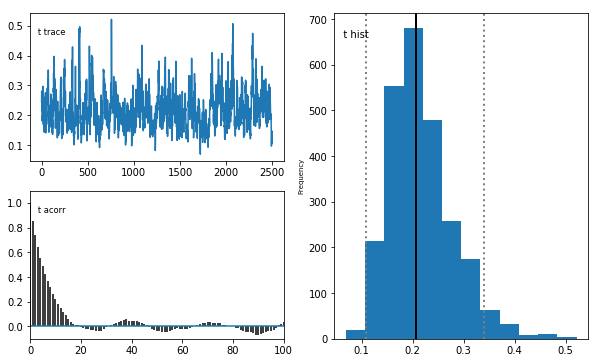

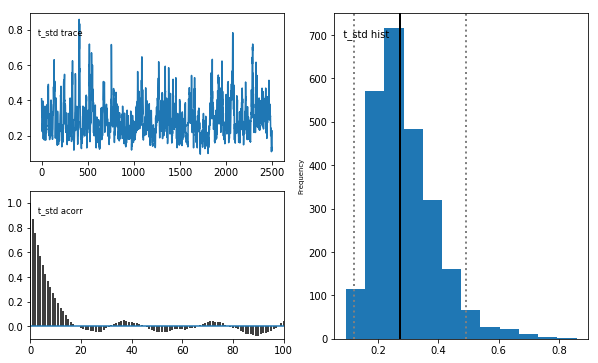

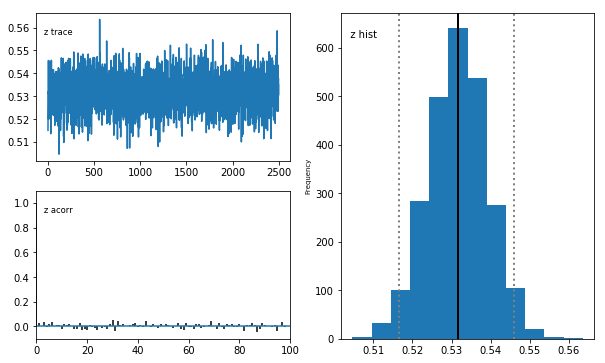

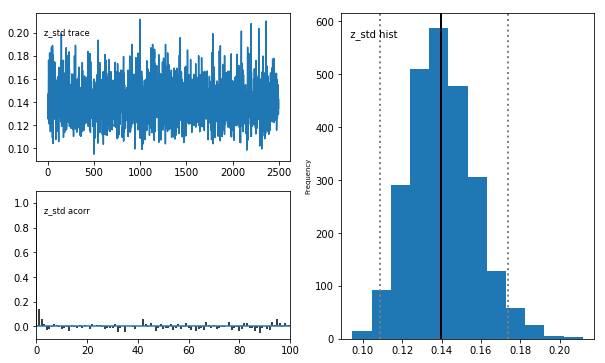

In [59]:
flat_dic = []
model_name = ['sim_flat model']

m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                    model_name=model_name[0])
flat_dic.append(m.dic)

In [60]:
np.savetxt(write_dir+'sim_dics/sim_flat_model_dic.csv', flat_dic, header='flat_model', delimiter=',',comments='')

In [61]:
flat_model_dic_dir = write_dir+'sim_dics/sim_flat_model_dic.csv'
flat_model_dic = pd.read_csv(flat_model_dic_dir)
flat_model_dic.columns = flat_model_dic.columns.str.strip()

In [62]:
all_dics = pd.concat([flat_model_dic, single_param_dics, dual_param_dics, triple_param_dics], axis=1)

In [64]:
all_dics.columns

Index(['flat_model', 'sim_a_alone', 'sim_v_alone', 'sim_tr_alone',
       'sim_z_alone', 'sim_a_v', 'sim_tr_v', 'sim_z_v', 'sim_a_v_tr',
       'sim_z_v_tr'],
      dtype='object')

In [74]:
triple_param_model_names

['sim_a_v_tr', 'sim_z_v_tr']

In [75]:
plotting_order = triple_param_model_names + dual_param_model_names + model_names + ['flat_model']

In [66]:
plotting_order[-1], all_dics.columns[0]

('flat_model', 'flat_model')

In [76]:
all_dics
flat_subtracted_dics=all_dics.subtract(all_dics.flat_model, axis=0) 

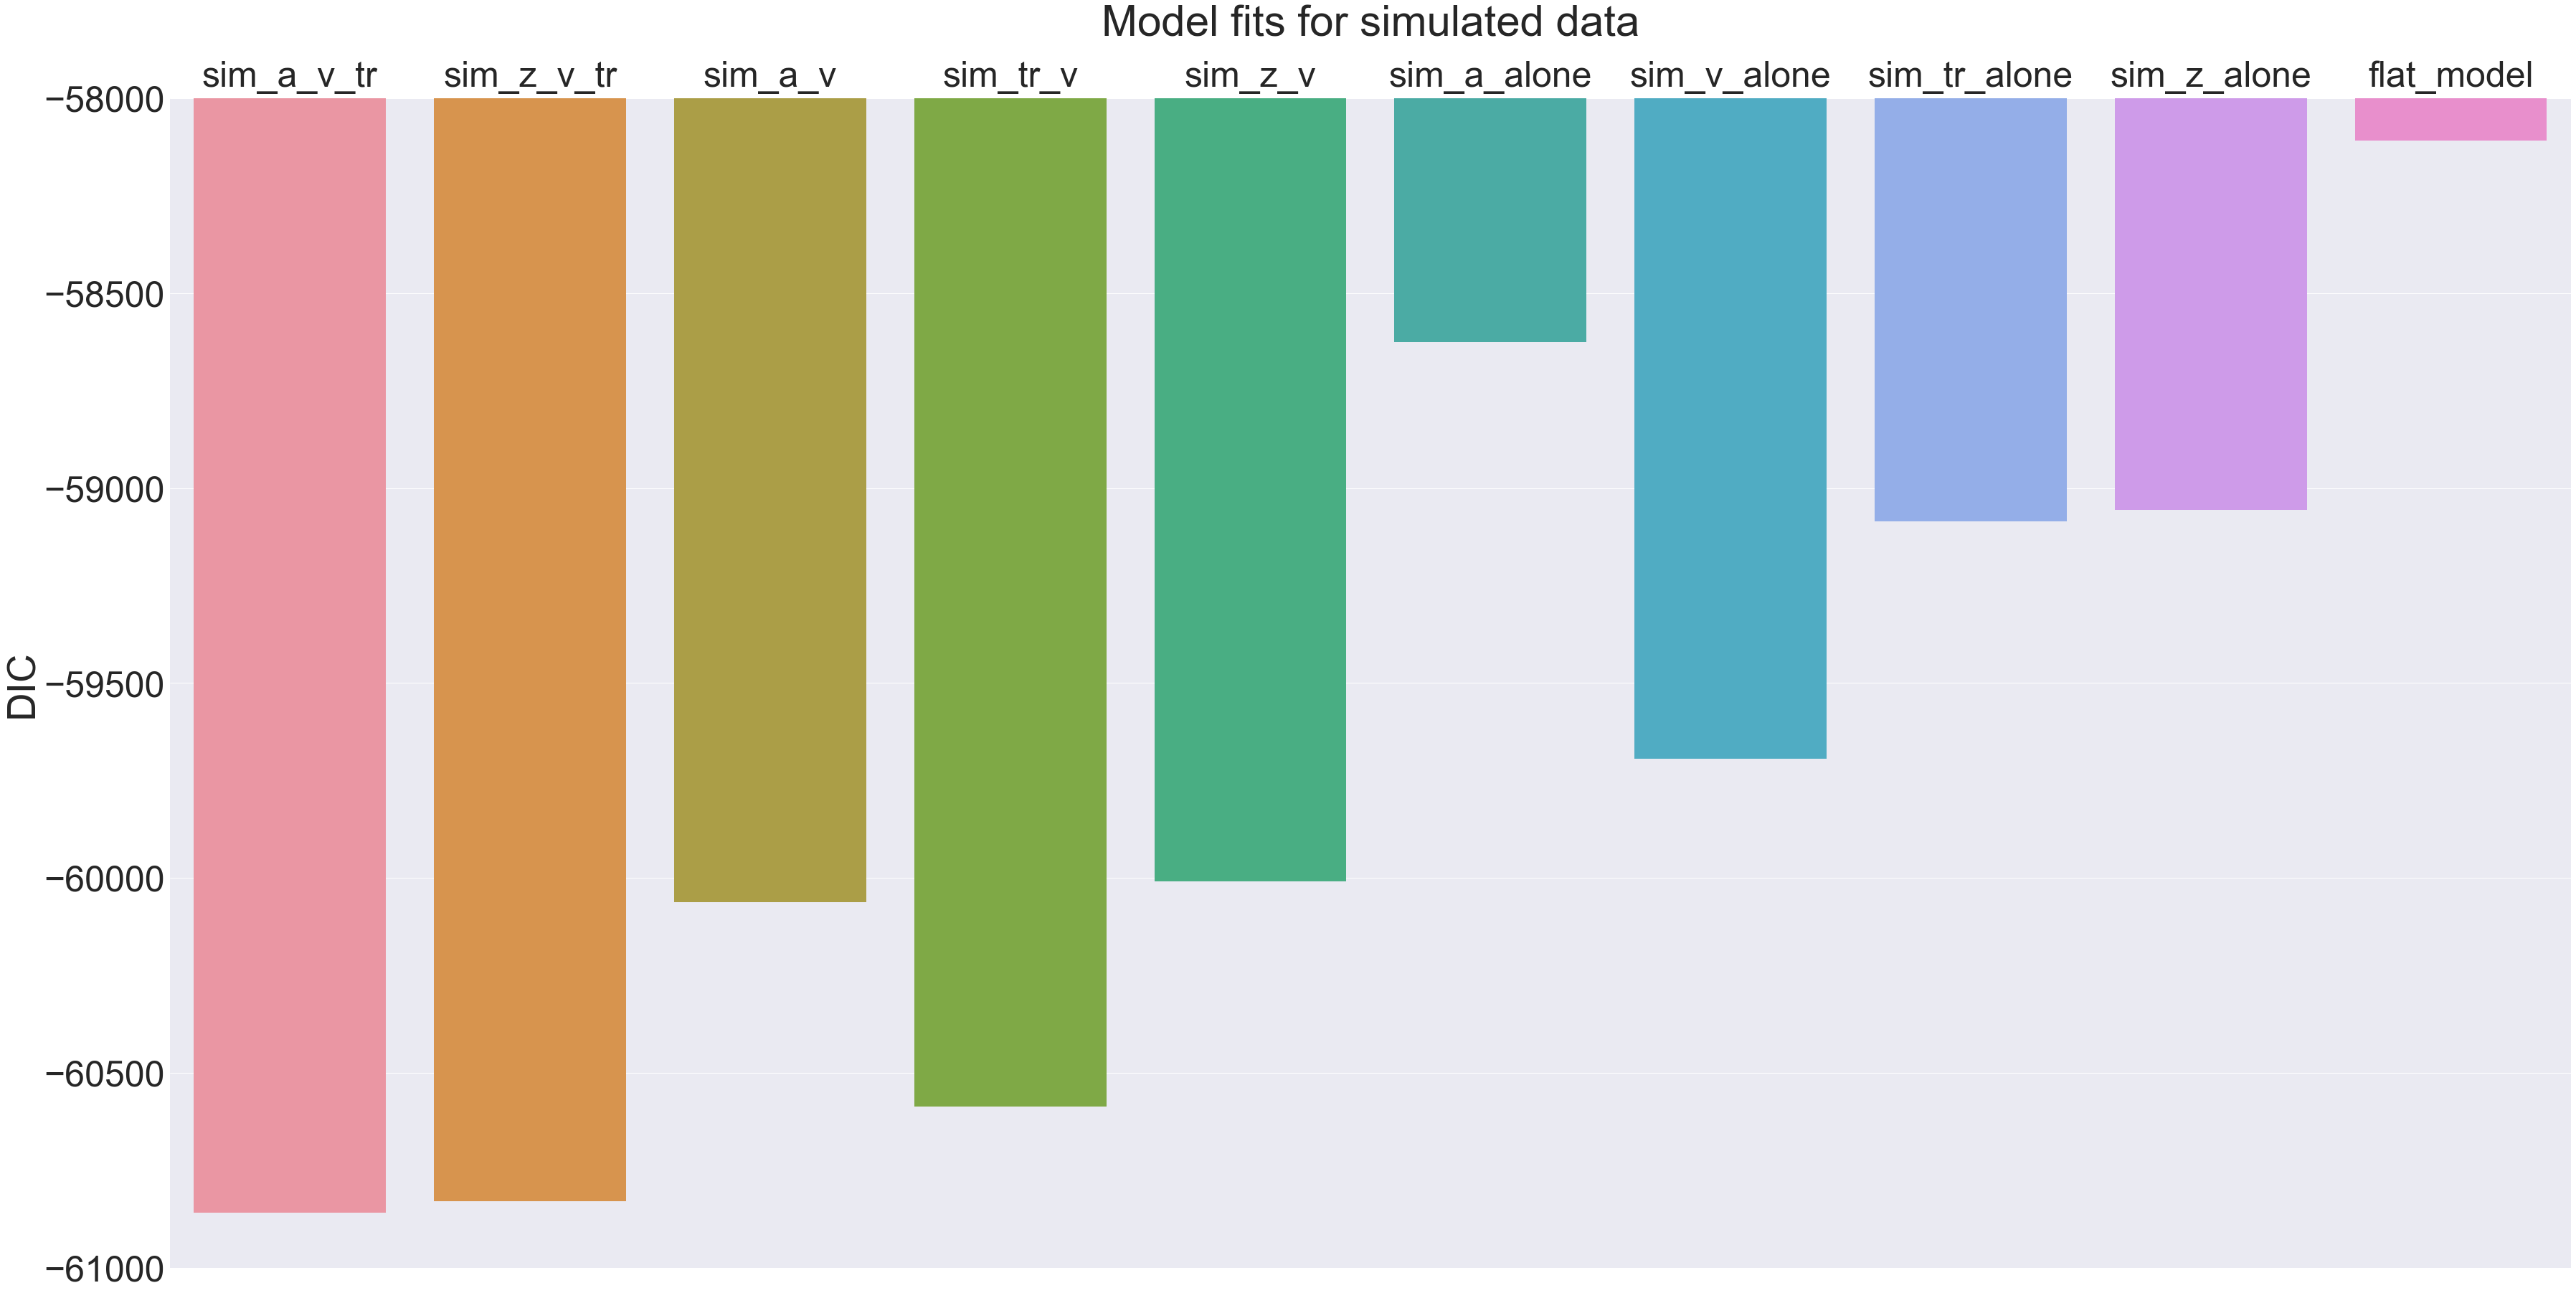

In [77]:
sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=all_dics, order=plotting_order)
ax.set(ylabel='DIC')
plt.ylim(-61000, -58000)
ax.set_title('Model fits for simulated data',  y=1.05)
ax.xaxis.tick_top()
# plt.savefig(write_dir+'sim_all_dics.pdf')

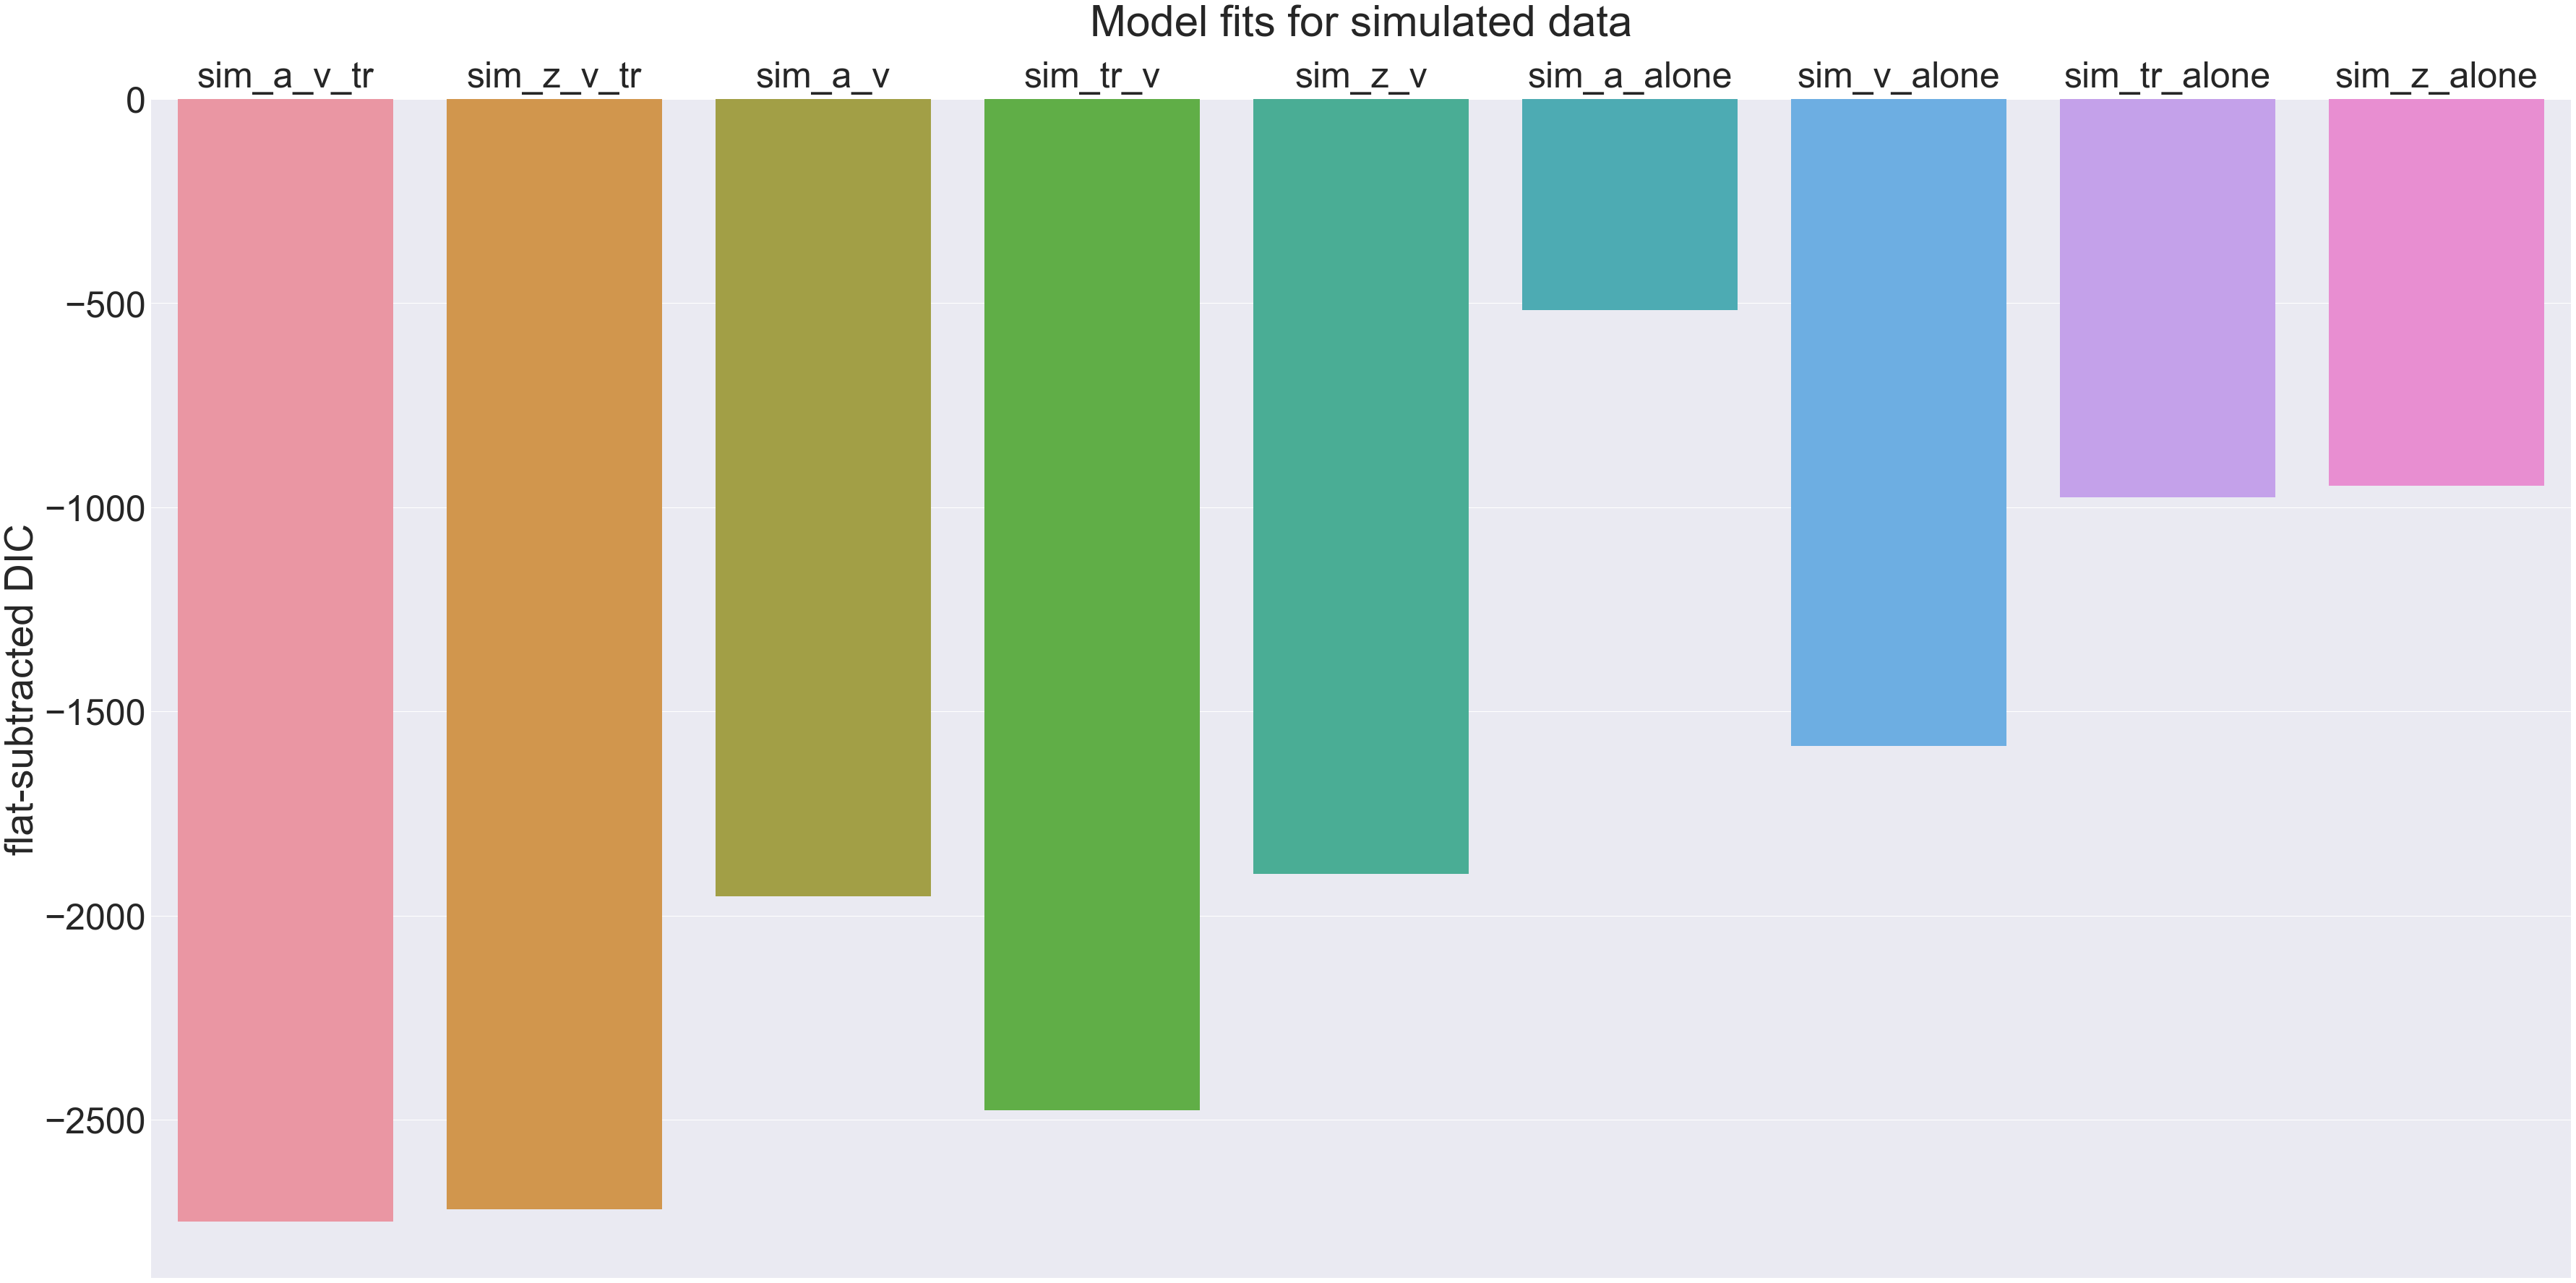

In [78]:
sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=flat_subtracted_dics, order=plotting_order[:-1])
ax.set(ylabel='flat-subtracted DIC')
# plt.ylim(-72000, -69000)
ax.set_title('Model fits for simulated data',  y=1.05)
ax.xaxis.tick_top()
# plt.savefig(write_dir+'sim_flat_sub_all_dics.pdf')

## plot the posteriors for the winning model 

/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 820.8 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std


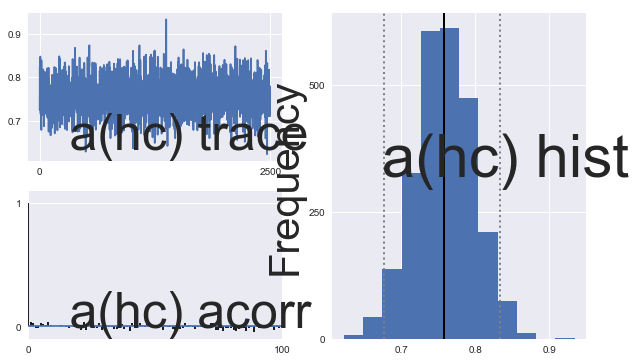

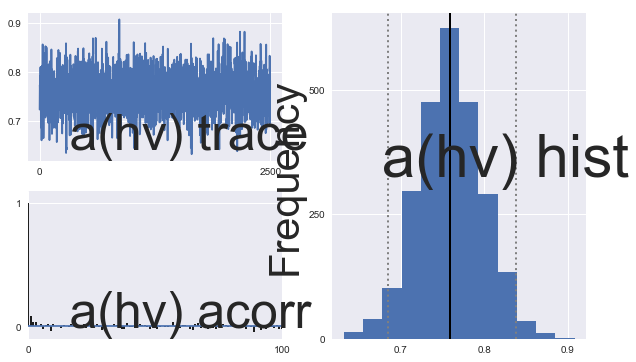

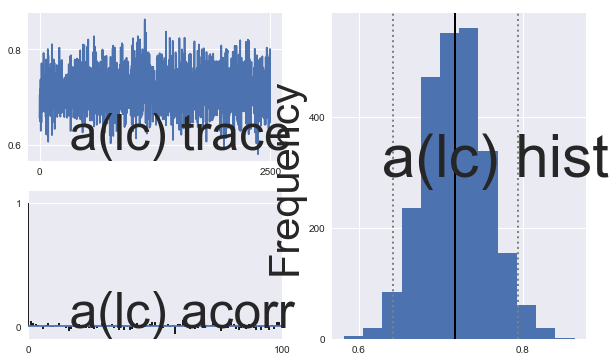

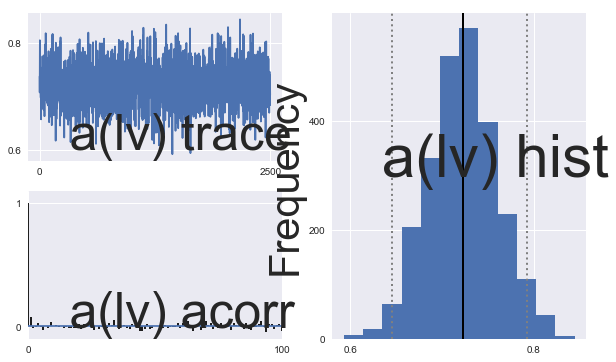

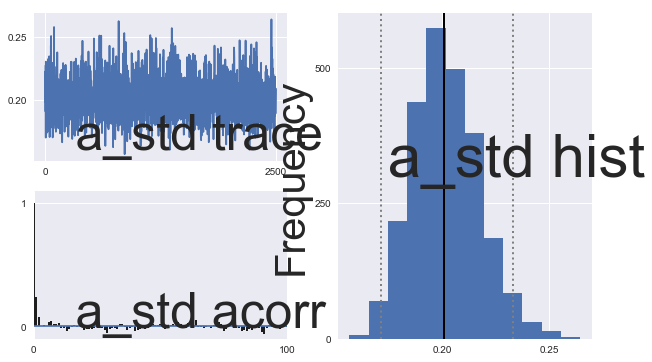

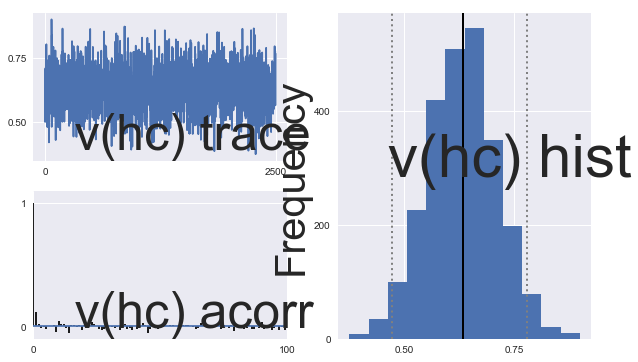

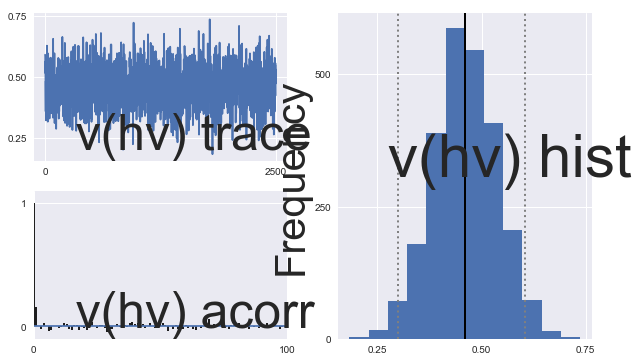

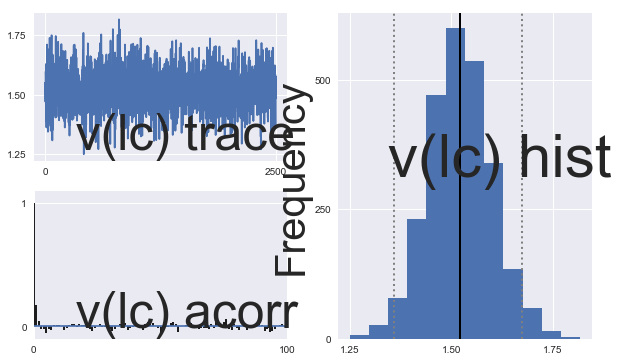

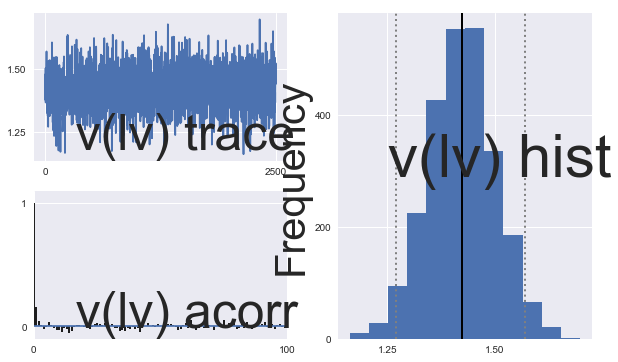

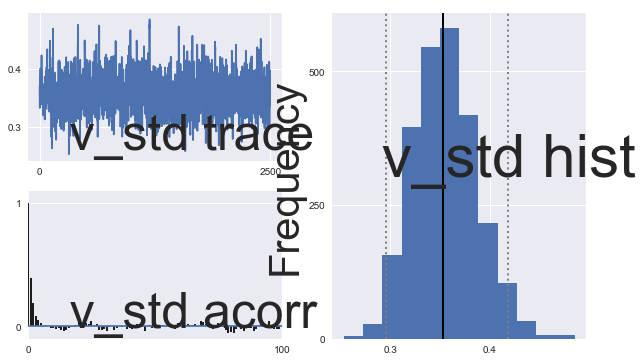

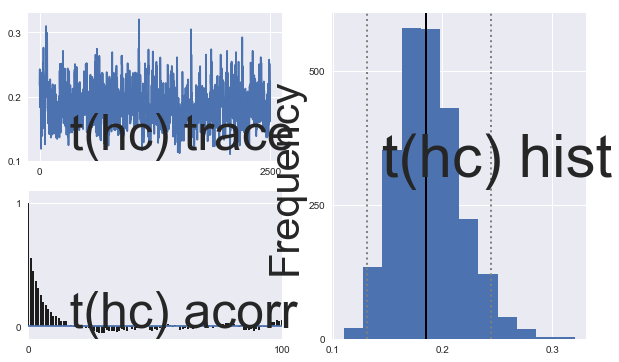

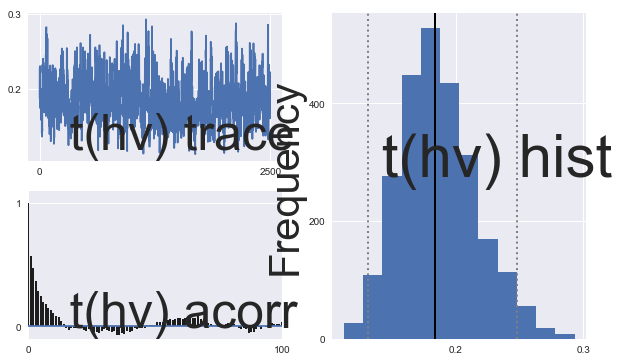

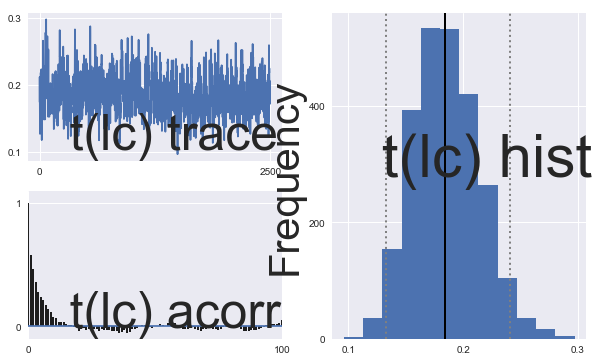

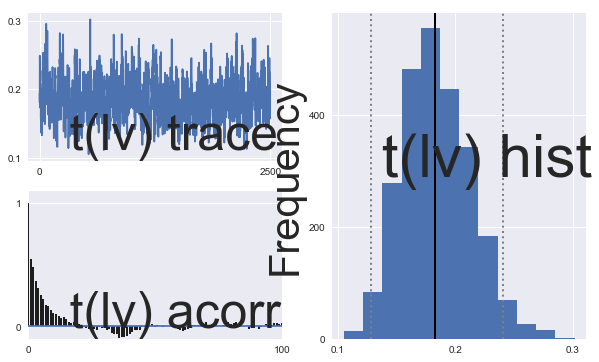

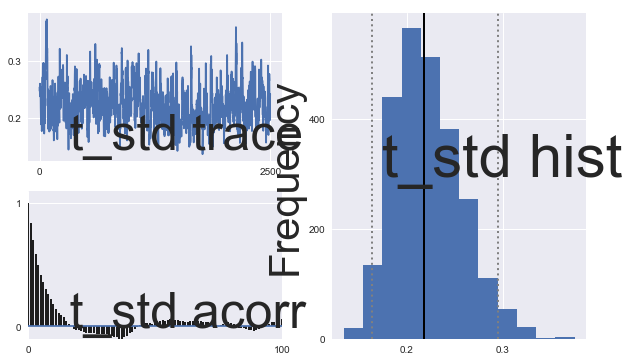

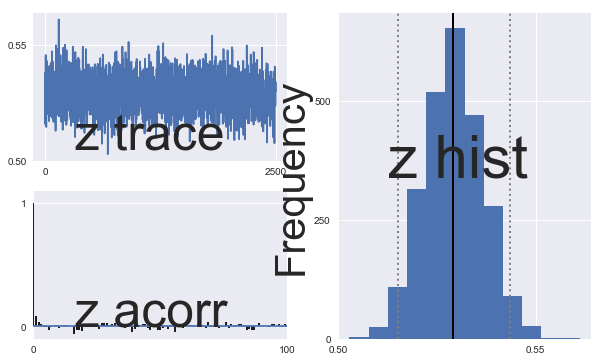

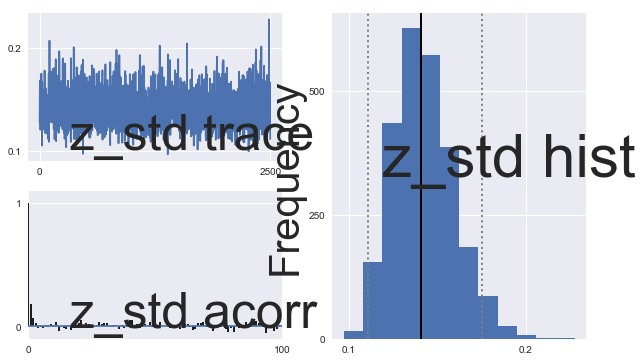

In [79]:
winning_model_name = 'sim_a_v_tr_traces_winning'
winning_model=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                    model_name=winning_model_name, depends_on={'a':'stim','v':'stim', 't':'stim'},
                                  save_traces=True)

In [84]:
winning_model.save(write_dir+winning_model_name)

In [85]:
winning_model=hddm.load(write_dir+winning_model_name)

### drift rate 

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
v_hc, v_hv, v_lc, v_lv = winning_model.nodes_db.ix[['v(hc)', 'v(hv)', 'v(lc)', 'v(lv)'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
# plt.savefig('drift_posterior.pdf')

### threshold

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

a_hc, a_hv, a_lc, a_lv = winning_model.nodes_db.ix[['a(hc)', 'a(hv)', 'a(lc)', 'a(lv)'], 'node']


threshold_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
# plt.savefig('threshold_posterior.pdf')

### non-decision time

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

tr_hc, tr_hv, tr_lc, tr_lv = winning_model.nodes_db.ix[['t(hc)', 't(hv)', 't(lc)', 't(lv)'], 'node']


ndt_fig=hddm.analyze.plot_posterior_nodes([tr_hc, tr_hv, tr_lc, tr_lv])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
# plt.savefig('ndt_posterior.pdf')